# Capstone project notebook for group : 10428

# Project Title :
# GLOBAL STOCK INDICES AND SECTORAL SUB-INDICES: CORRELATION DYNAMICS AND RISK CLUSTERING PRE- AND POST-COVID-19

## Project highlights and scope :
Many stock indices are used by the major equity markets around the world that showcase the state and trajectory of their respective national and industry-specific economies. Market investors, analysts, and policymakers use these indices as benchmarks, including the S&P 500 (US), FTSE 100 (UK), Nikkei 225 (Japan), Shanghai Composite (China), NIFTY 50 (India), Bovespa (Brazil), KOSPI (South Korea) and many more to invest and diversify risk across the globe. Global equity markets were shocked by COVID-19, and cross-market correlation changed a lot. This emphasizes how important it is to examine and analyse these changing dynamics of the equity indices and sub indices in order to manage risk and diversify a portfolio effectively.

Our capstone project would examine and analyse the changing dynamics of the equity indices and sub-indices across the world in order to manage risk and diversify a portfolio effectively.

## Group and member details :
- Group number : 10428
- Members :
    - Emmanuel Oppong (oppongemma888@gmail.com)
    - Kinsuk Ghatak (kinsuk.analytics@gmail.com)

## Sec 1 : Extract and process the financial time series data for the main indices and sub indices

In [1]:
## Install packages :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from statsmodels.tsa.stattools import adfuller, acf
from scipy import stats
from scipy.stats import skew, kurtosis
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from datetime import datetime, timedelta


from itertools import combinations
import warnings
warnings.filterwarnings('ignore')


In [2]:

## Though we proposed a 10 years time line in our project proposal,
# we would like to revise the time line to 8 years here as this would help us with a decent volume to work on and focus on the core pre and post covid years.

## a common issue with weekly financial data where different indices may have their weekly data anchored to different days of the week. This happens because:
#Different markets have different trading schedules
#Some indices might not trade on certain days (holidays, market closures)
# yfinance's weekly aggregation can be inconsistent across different tickers

def standardize_weekly_to_friday(df, date_column='Date'):
    """
    Standardize weekly data to always end on Friday

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with weekly data
    date_column : str
        Name of the date column

    Returns:
    --------
    pandas.DataFrame
        DataFrame with dates adjusted to Friday week-endings
    """

    df = df.copy()
    df[date_column] = pd.to_datetime(df[date_column])

    # Create a new column for the Friday of each week
    df['Week_Year'] = df[date_column].dt.isocalendar().week
    df['Year'] = df[date_column].dt.year

    # Calculate the Friday of each week
    # Method: Find the Friday of the ISO week for each date
    def get_friday_of_week(date):
        # Get the Monday of the ISO week
        monday = date - timedelta(days=date.weekday())
        # Friday is 4 days after Monday
        friday = monday + timedelta(days=4)
        return friday

    df['Friday_Date'] = df[date_column].apply(get_friday_of_week)

    # Replace the original date with Friday date
    df[date_column] = df['Friday_Date']

    # Remove helper columns
    df = df.drop(['Week_Year', 'Year', 'Friday_Date'], axis=1)

    # Sort by date to ensure proper order
    df = df.sort_values(date_column).reset_index(drop=True)

    return df



def extract_data(Ticker, frequency):
  """
    Extract equity indices data from yfinance and calculate the percentage returns

    Parameters:
    ticker (str): index ticker symbol (e.g., 'AAPL', 'SPY')
    frequency (str): Data frequency ('1d', '1wk', '1mo', '1h', etc.)
    """
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")

  df['Close']=df['Close'].astype(float)
  df["pctg_return"]=df['Close'].pct_change()

  del df["Open"]
  # del df["Close"]
  del df["High"]
  del df["Low"]
  del df["Volume"]

  df = df.dropna()

  df.reset_index(inplace=True)

  # If weekly frequency, standardize to Friday week-endings
  if frequency == '1wk':
    df = standardize_weekly_to_friday(df)

  return df



In [3]:
## Exatrct the data for the List of 8 indices :

def create_stacked_df(frequency):


  Index_list= ['^GSPC', '^FTSE', '^GDAXI', '^N225', '000001.SS', '^NSEI', '^BVSP', '^KS200']
  Index_Names=['S&P500', 'FTSE100', 'DAX', 'Nikkei225', 'Shanghai Composite', 'NIFTY50', 'Bovespa', 'Kospi200']
  df_index_all=pd.DataFrame()

  for index in Index_list:
    print(Index_list.index(index))
    df_index=extract_data(index, frequency=frequency)
    df_index.columns = df_index.columns.droplevel(1)
    df_index=df_index[['Date','Close','pctg_return']]
    df_index['Index_name']=Index_Names[Index_list.index(index)]
    df_index['Index_id']=Index_list[Index_list.index(index)]
    df_index_all = pd.concat([df_index_all, df_index], axis=0, ignore_index=True)
  return df_index_all


df_index_all_daily= create_stacked_df('1d')
df_index_all_weekly= create_stacked_df('1wk')
df_index_all_mthly= create_stacked_df('1mo')

0


[*********************100%***********************]  1 of 1 completed


1


[*********************100%***********************]  1 of 1 completed


2


[*********************100%***********************]  1 of 1 completed


3


[*********************100%***********************]  1 of 1 completed


4


[*********************100%***********************]  1 of 1 completed


5


[*********************100%***********************]  1 of 1 completed


6


[*********************100%***********************]  1 of 1 completed


7


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


0
1


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2


[*********************100%***********************]  1 of 1 completed

3


4


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


5
6


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


7
0


[*********************100%***********************]  1 of 1 completed


1


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2
3


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


4
5


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


6
7


[*********************100%***********************]  1 of 1 completed


In [4]:
pivot_data = df_index_all_daily.pivot(index='Date', columns='Index_name', values='pctg_return')

# Drop any rows with all NaN values
pivot_data = pivot_data.dropna()
pivot_data

Index_name   Bovespa       DAX   FTSE100  Kospi200   NIFTY50  Nikkei225  \
Date                                                                      
2016-01-05  0.006597  0.002592  0.007188  0.006393 -0.000854  -0.004172   
2016-01-06 -0.015229 -0.009319 -0.010396 -0.006479 -0.005607  -0.009942   
2016-01-07 -0.025806 -0.022926 -0.019643 -0.011381 -0.022310  -0.023307   
2016-01-08 -0.002040 -0.013077 -0.007004  0.007545  0.004367  -0.003905   
2016-01-12 -0.010914  0.016321  0.009776 -0.001213 -0.007080  -0.027065   
...              ...       ...       ...       ...       ...        ...   
2023-12-20 -0.007941 -0.000678  0.010173  0.017910 -0.014121   0.013744   
2023-12-21  0.010535 -0.002727 -0.002722 -0.003799  0.004960  -0.015901   
2023-12-22  0.004320  0.001124  0.000364  0.001061  0.004439   0.000862   
2023-12-27  0.004950  0.002148  0.003573  0.005793  0.009953   0.011271   
2023-12-28 -0.000067 -0.002420 -0.000298  0.015690  0.005724  -0.004205   

Index_name    S&P500  Shanghai Composite  
Date                                      
2016-01-05  0.002012           -0.002593  
2016-01-06 -0.013115            0.022547  
2016-01-07 -0.023700           -0.070449  
2016-01-08 -0.010838            0.019651  
2016-01-12  0.007803            0.002041  
...              ...                 ...  
2023-12-20 -0.014684           -0.010326  
2023-12-21  0.010301            0.005722  
2023-12-22  0.001660           -0.001350  
2023-12-27  0.001430            0.005428  
2023-12-28  0.000370            0.013755  

[1561 rows x 8 columns]

## Sec 2 : Exploratory analysis :

 ### Sec 2.1 Time series trend charts and descriptive statistics analysis for the various frequencies

 Daily return plot : 
Indices found: ['^GSPC' '^FTSE' '^GDAXI' '^N225' '000001.SS' '^NSEI' '^BVSP' '^KS200']
Number of indices: 8


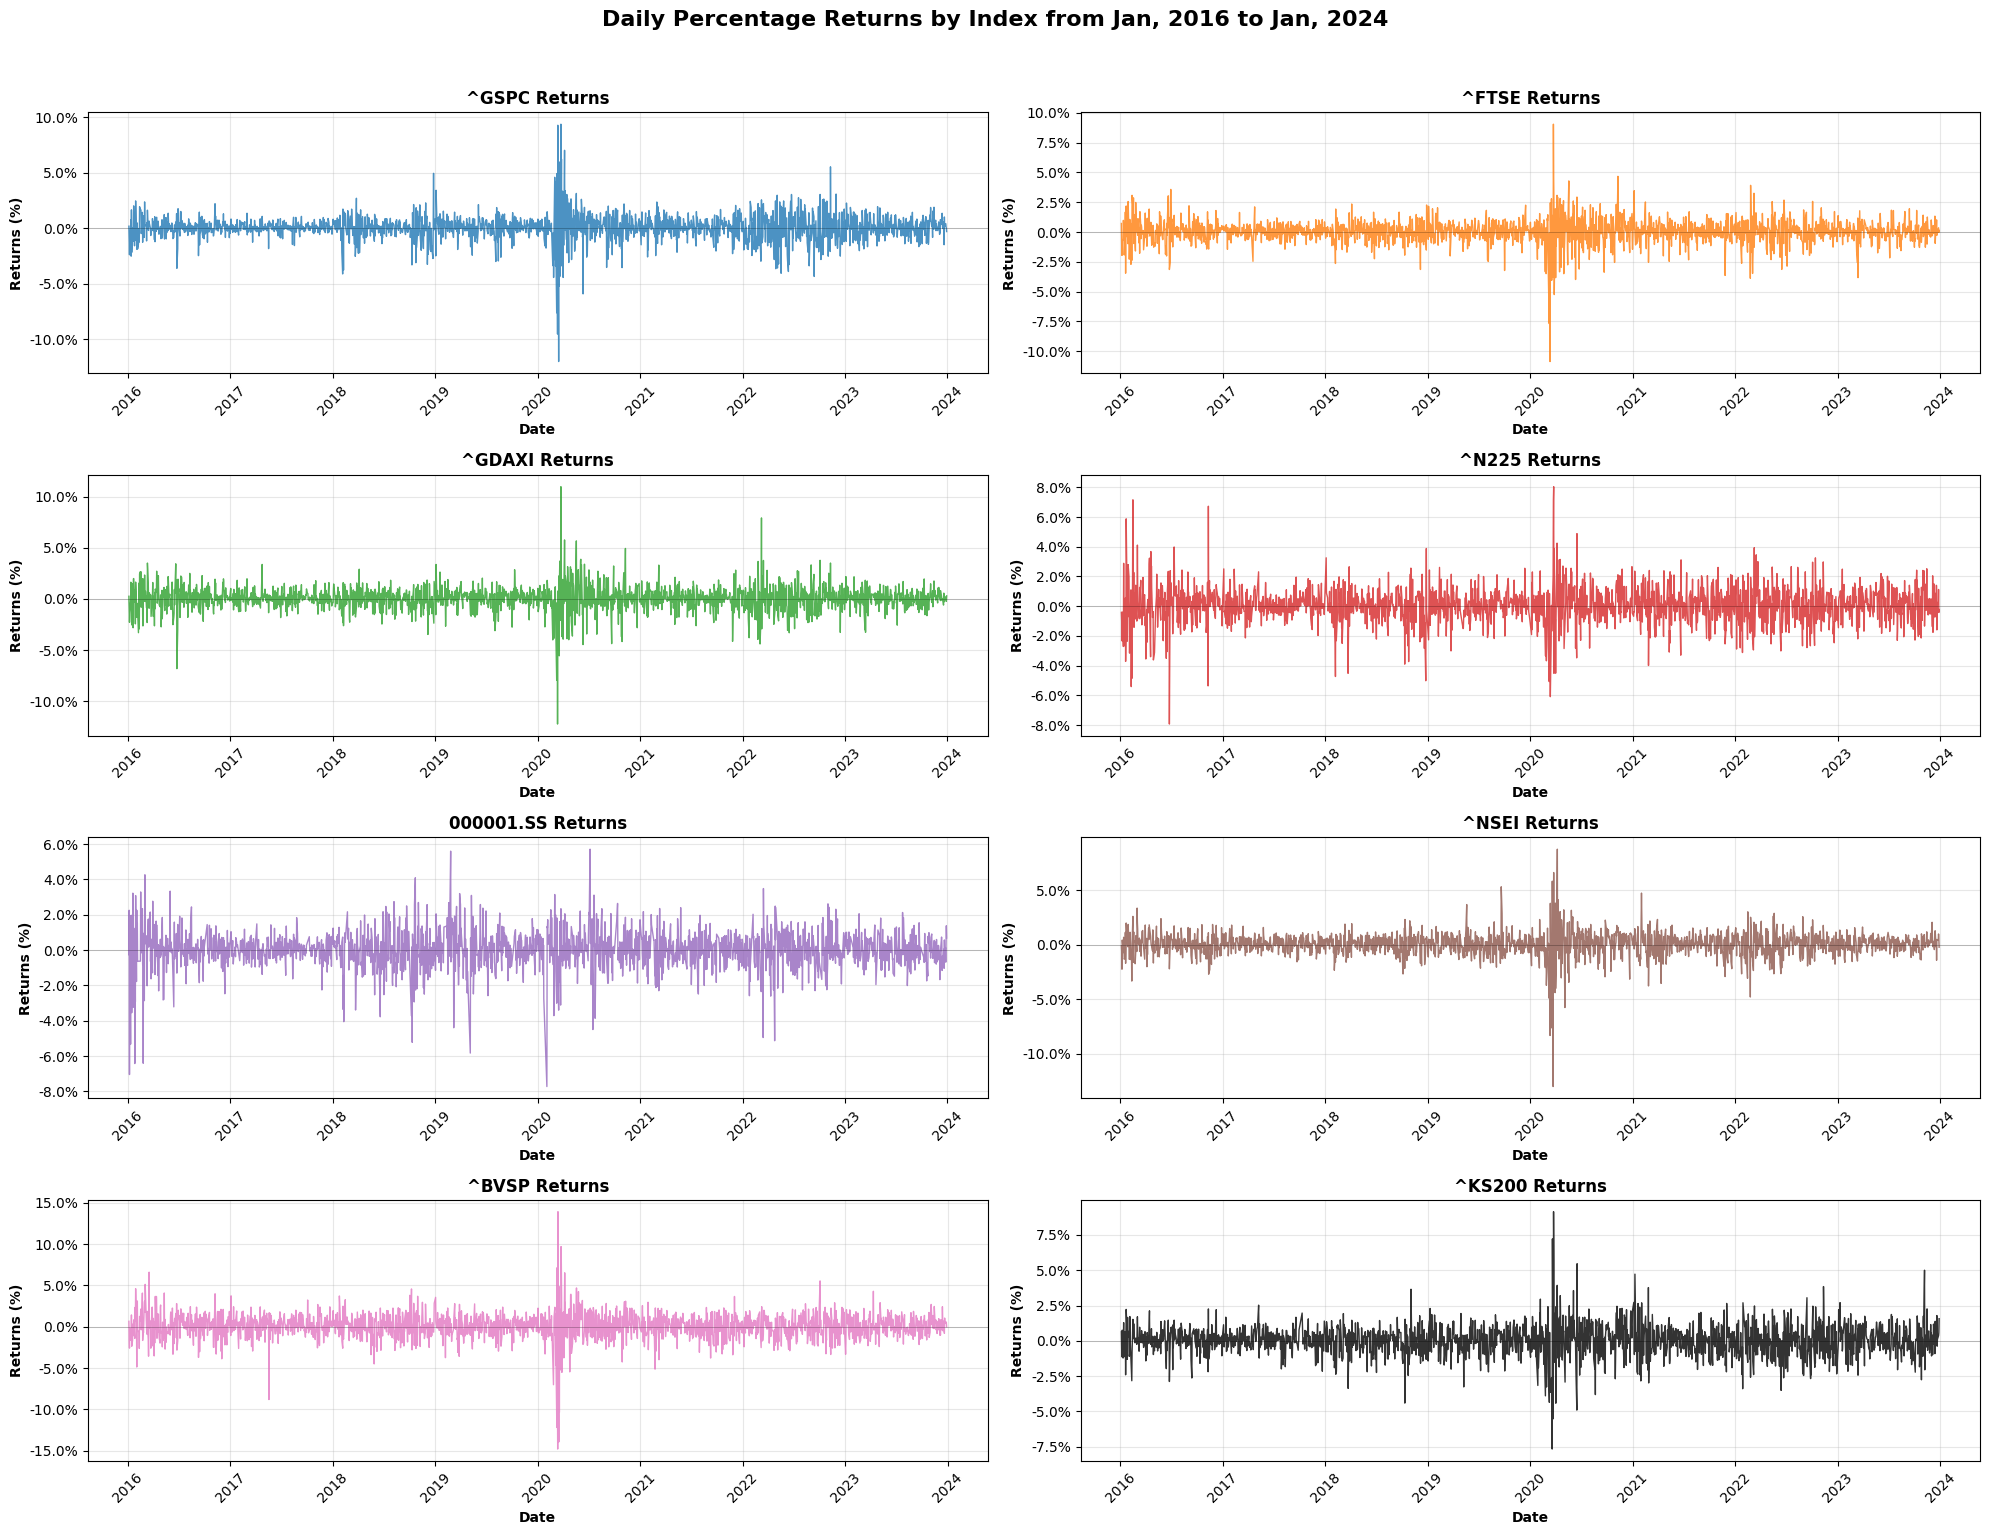

 Weekly return plot : 
Indices found: ['^GSPC' '^FTSE' '^GDAXI' '^N225' '000001.SS' '^NSEI' '^BVSP' '^KS200']
Number of indices: 8


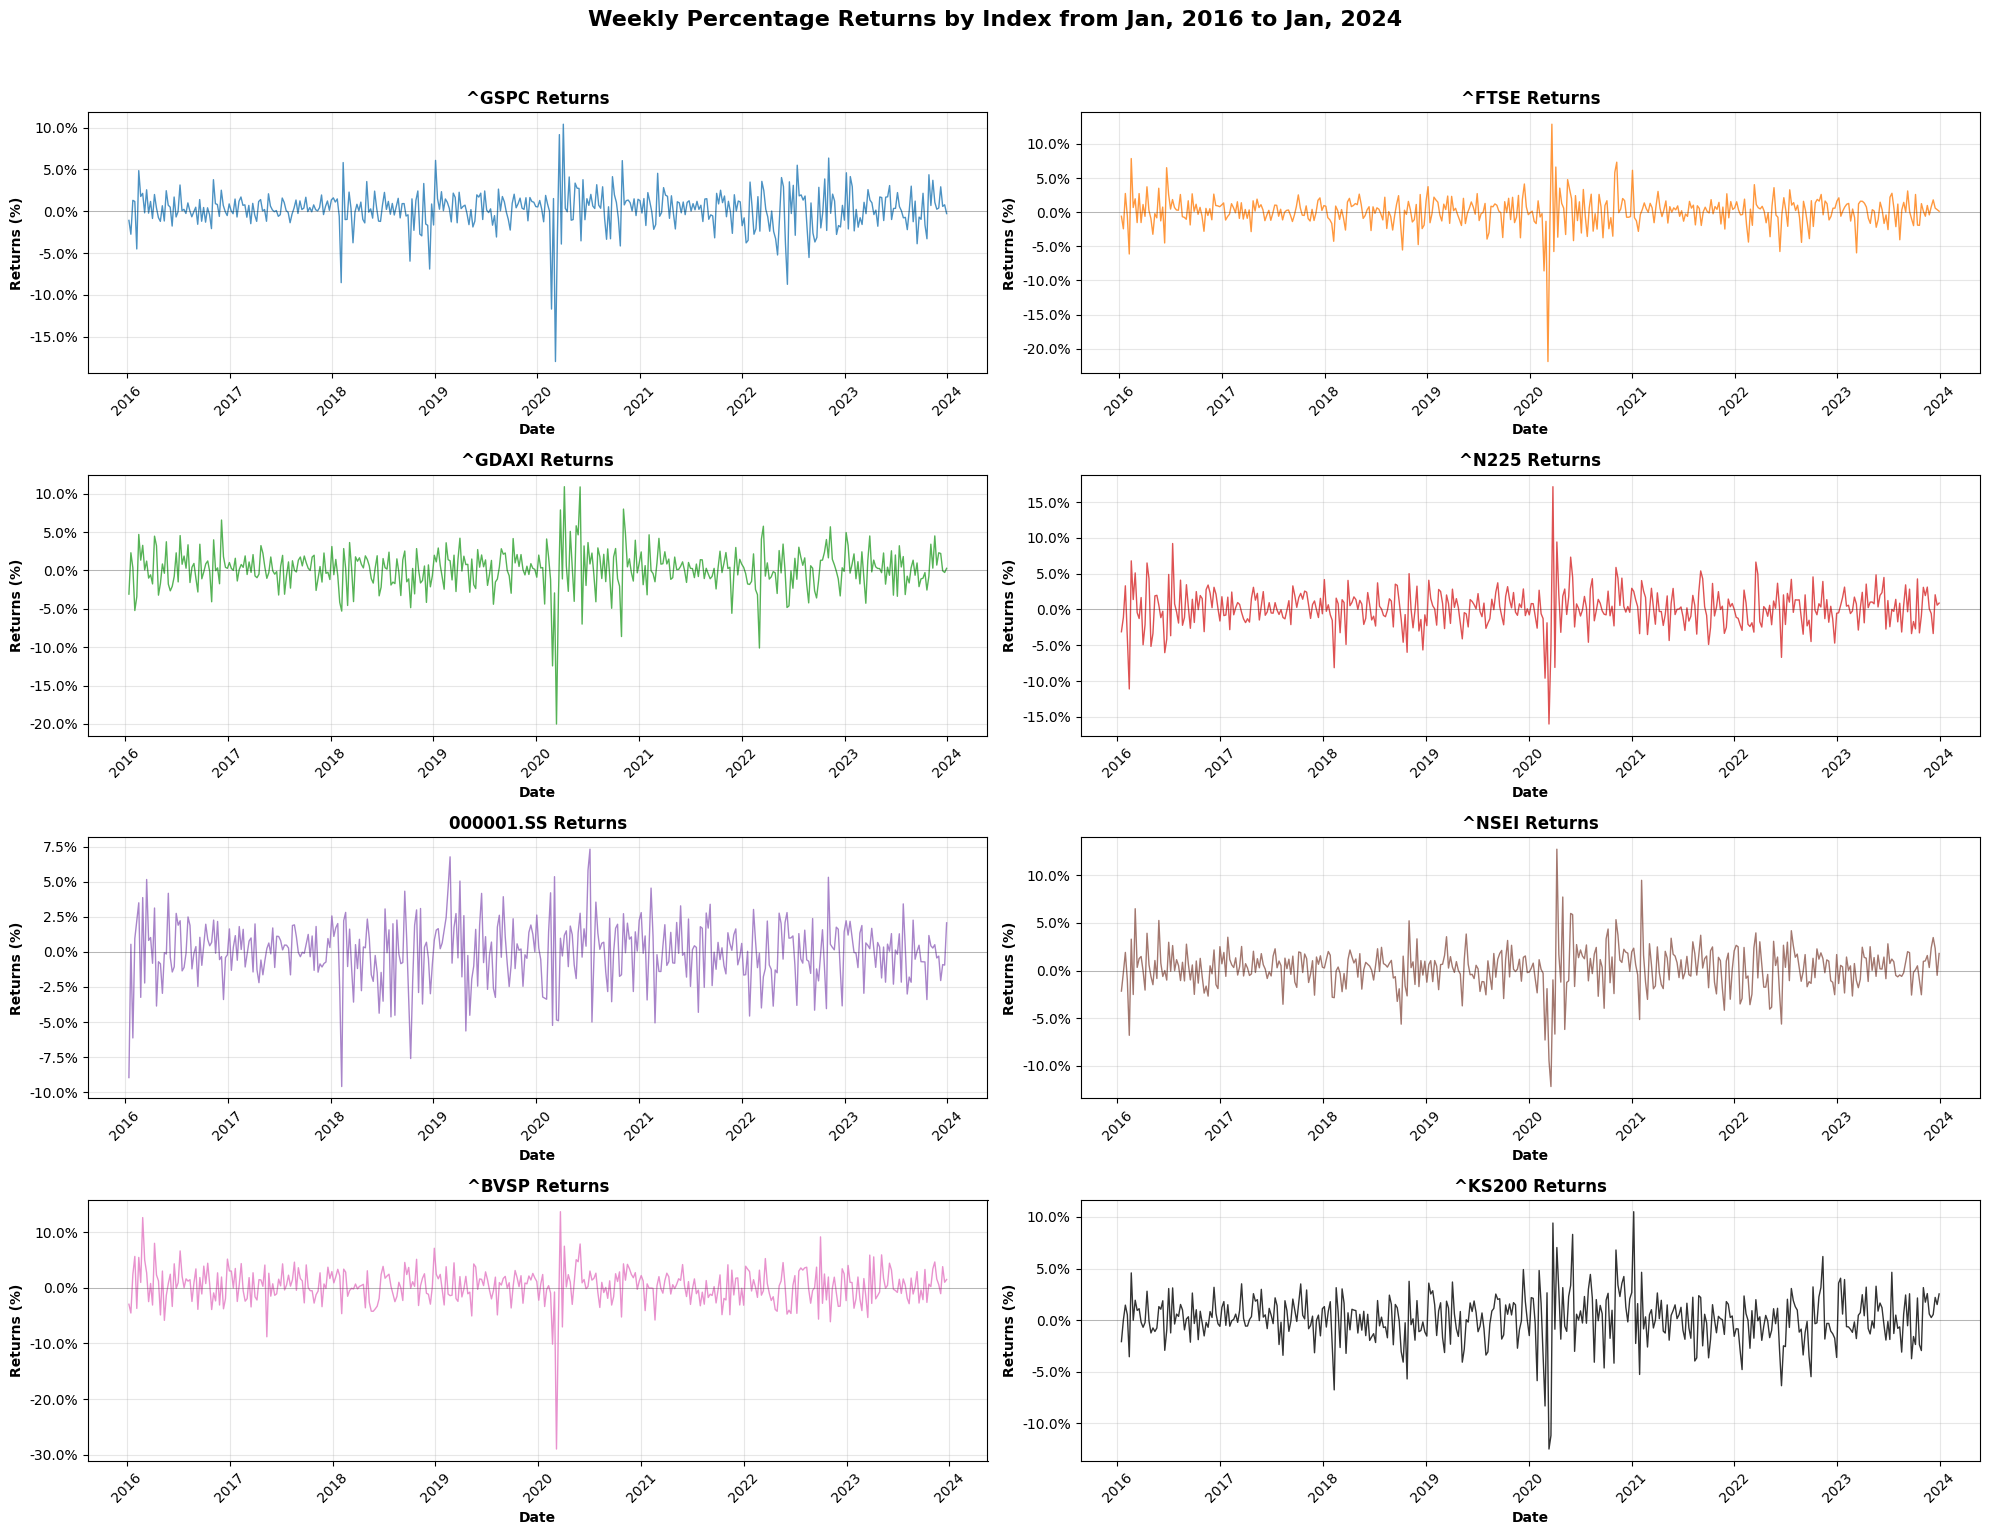

 Monthly return plot : 
Indices found: ['^GSPC' '^FTSE' '^GDAXI' '^N225' '000001.SS' '^NSEI' '^BVSP' '^KS200']
Number of indices: 8


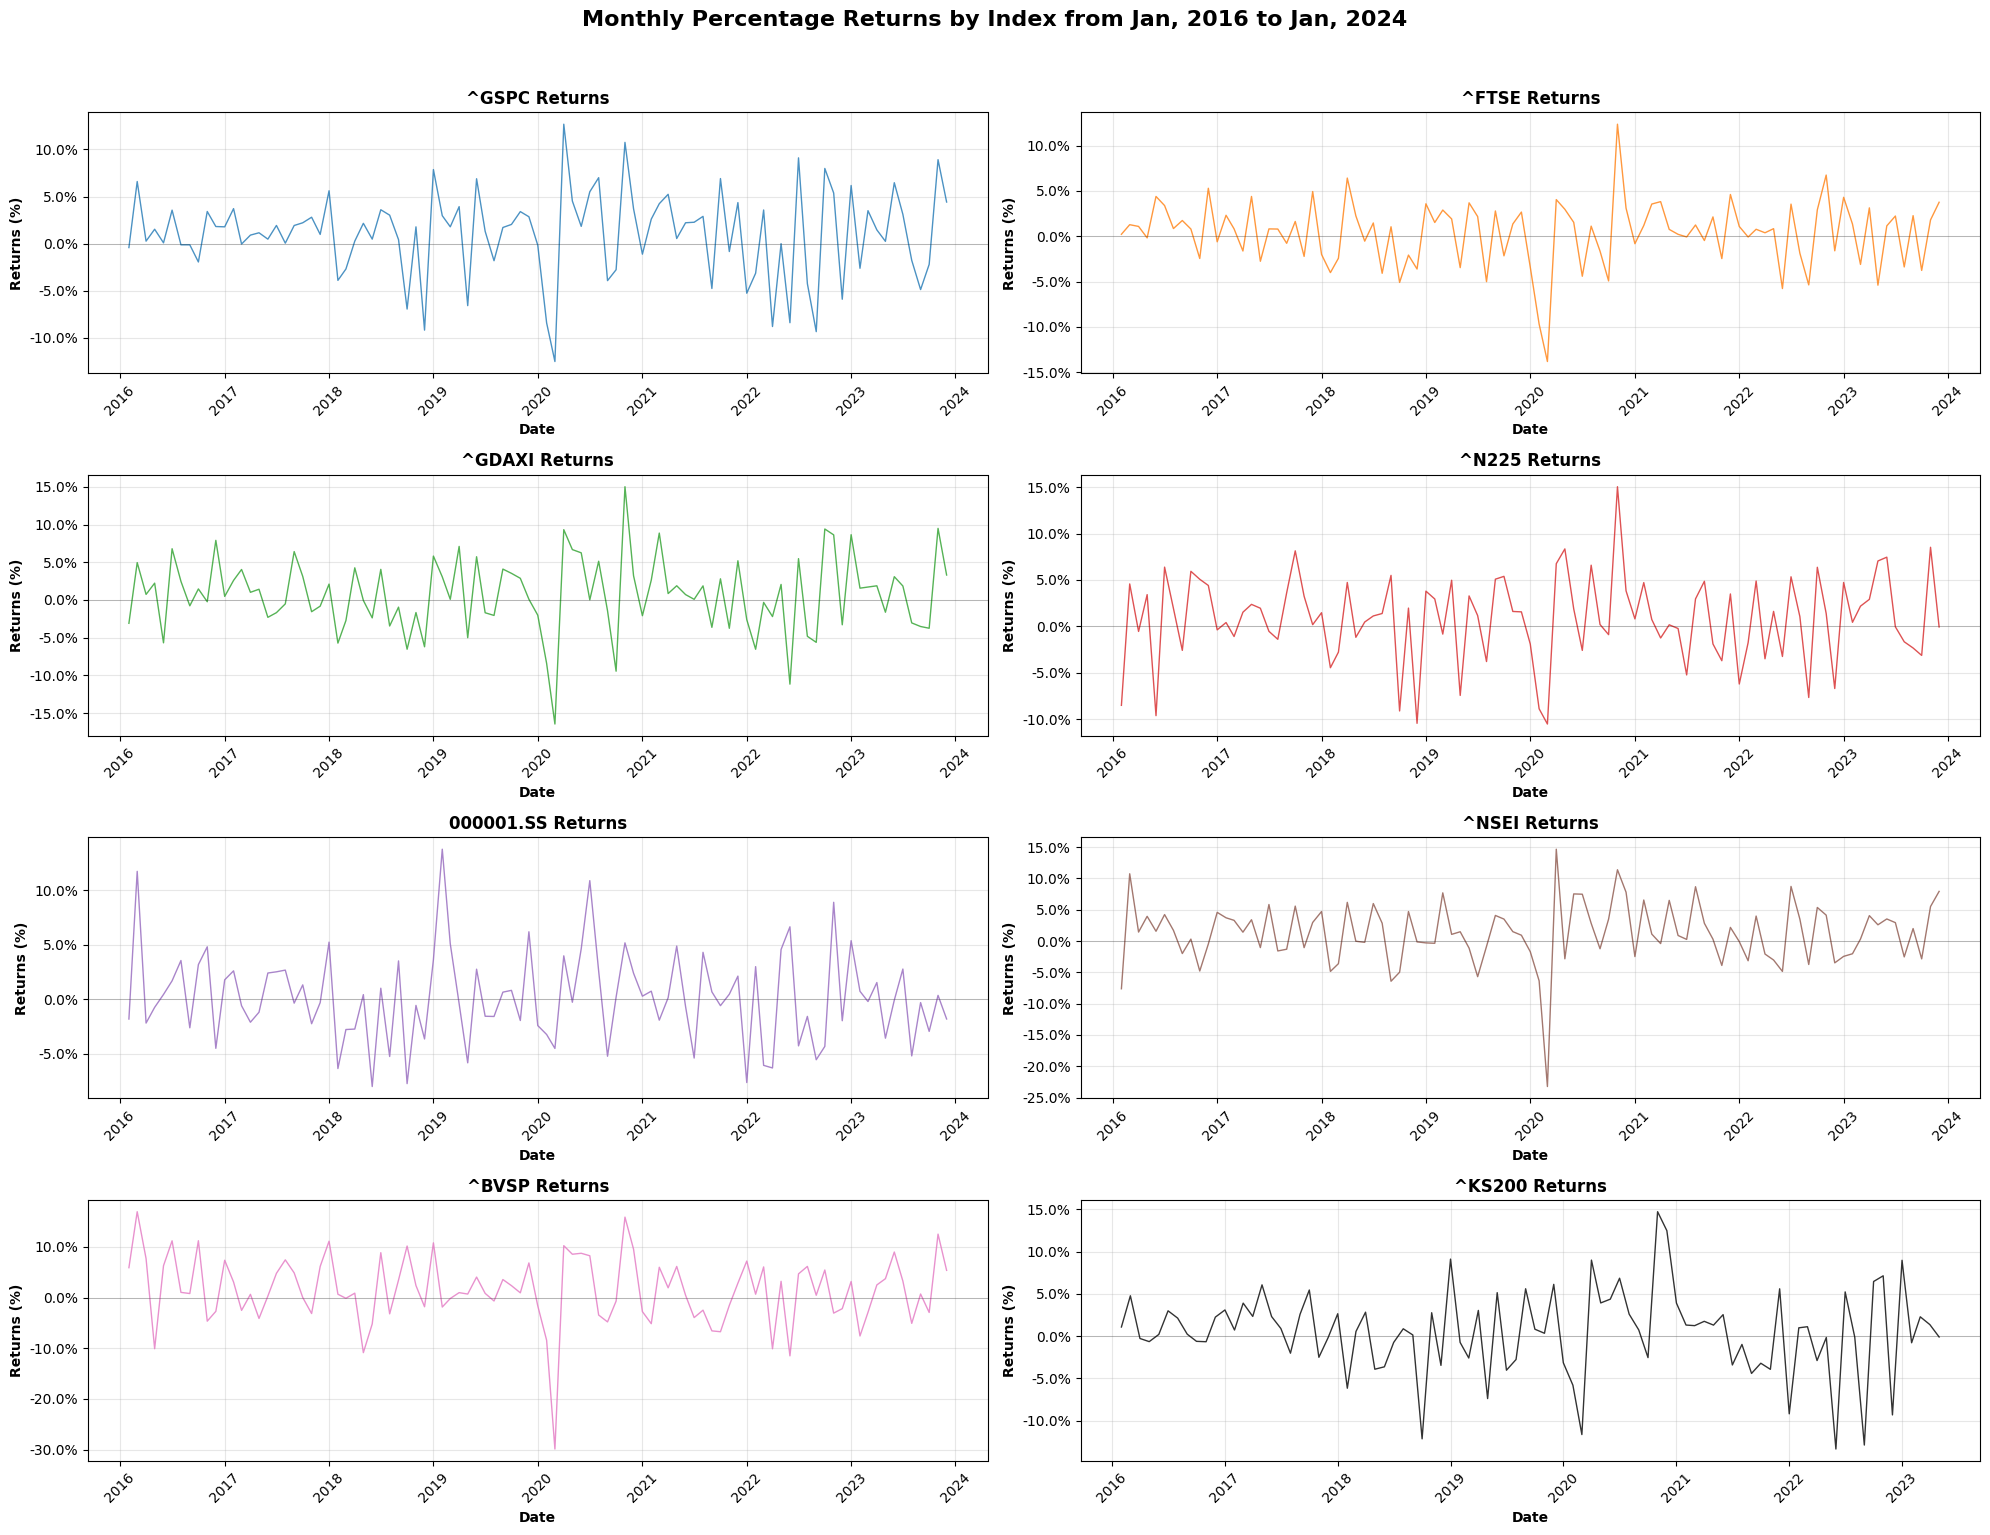

In [5]:
## Plot individual time series returns for multiple indices:
def plot_index_returns(df_input, freq,
                       date_column='Date',
                       index_column='Index_id',
                       value_column='pctg_return',
                       title= None,
                       start_date=None,
                       end_date=None,
                       figsize=(20, 15)):
    """
    Plot individual time series returns for multiple indices

    Parameters:
    -----------
    df_input : pandas.DataFrame
        Input dataframe containing the data
    date_column : str, default 'Date'
        Name of the date column
    index_column : str, default 'Index_id'
        Name of the index identifier column
    value_column : str, default 'pctg_return'
        Name of the returns column to plot
    title : str, default 'Individual Percentage Returns by Index (2016-2024)'
        Main title for the plot
    figsize : tuple, default (12, 20)
        Figure size (width, height)

    Returns:
    --------
    None (displays the plot)
    """
    if title is None:
        start_dt = pd.to_datetime(start_date)
        end_dt = pd.to_datetime(end_date)


        start_formatted = start_dt.strftime('%b, %Y')
        end_formatted = end_dt.strftime('%b, %Y')

        title = f'{freq.capitalize()} Percentage Returns by Index from {start_formatted} to {end_formatted}'


    df = df_input.copy()
    df[date_column] = pd.to_datetime(df[date_column])


    if start_date:
        start_date = pd.to_datetime(start_date)
        df = df[df[date_column] >= start_date]
        timeline_start = start_date.strftime('%Y-%m-%d')
    else:
        timeline_start = df[date_column].min().strftime('%Y-%m-%d')

    if end_date:
        end_date = pd.to_datetime(end_date)
        df = df[df[date_column] <= end_date]
        timeline_end = end_date.strftime('%Y-%m-%d')
    else:
        timeline_end = df[date_column].max().strftime('%Y-%m-%d')



    indices = df[index_column].unique()
    print(f"Indices found: {indices}")

    n_indices = len(indices)
    print(f"Number of indices: {n_indices}")


    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#000000']

    # Create subplots - dynamically adjust based on number of indices
    fig, axes = plt.subplots(4,2, figsize=figsize)
    axes = axes.flatten()



    for i, index in enumerate(indices):
        # Filter data for current index
        index_data = df[df[index_column] == index].copy()
        index_data = index_data.sort_values(date_column)


        axes[i].plot(index_data[date_column], index_data[value_column],
                    color=colors[i % len(colors)], linewidth=1, alpha=0.8)
        axes[i].set_title(f'{index} Returns', fontweight='bold', fontsize=12)

        axes[i].set_xlabel('Date', fontweight='bold', fontsize=10)
        axes[i].set_ylabel('Returns (%)', fontweight='bold', fontsize=10)
        axes[i].grid(True, alpha=0.3)
        axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.5)


        axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(title, fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


print( " Daily return plot : ")
plot_index_returns(df_index_all_daily , 'Daily', start_date='2016-01-01', end_date='2024-01-01')
print( " Weekly return plot : ")
plot_index_returns(df_index_all_weekly, "Weekly", start_date='2016-01-01', end_date='2024-01-01')
print( " Monthly return plot : ")
plot_index_returns(df_index_all_mthly, "Monthly", start_date='2016-01-01', end_date='2024-01-01')


### Sec 2.2. Descriptive statistics of the 8 main indices over the whole period

In [6]:
import pandas as pd
import numpy as np
from scipy import stats

def calculate_index_stats(df, start_date=None, end_date=None,
                         value_column='pctg_return',
                         date_column='Date',
                         index_column='Index_id'):
    """
    Calculate comprehensive statistics for financial indices and return as DataFrame

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the data
    start_date : str, optional
        Start date for analysis (format: 'YYYY-MM-DD')
    end_date : str, optional
        End date for analysis (format: 'YYYY-MM-DD')
    value_column : str, default 'pctg_return'
        Column name containing the values to analyze
    date_column : str, default 'Date'
        Column name containing dates
    index_column : str, default 'Index_id'
        Column name containing index identifiers

    Returns:
    --------
    pandas.DataFrame
        DataFrame with indices as rows and statistics as columns
    """


    data = df.copy()
    data[date_column] = pd.to_datetime(data[date_column])


    if start_date:
        start_date = pd.to_datetime(start_date)
        data = data[data[date_column] >= start_date]
        timeline_start = start_date.strftime('%Y-%m-%d')
    else:
        timeline_start = data[date_column].min().strftime('%Y-%m-%d')

    if end_date:
        end_date = pd.to_datetime(end_date)
        data = data[data[date_column] <= end_date]
        timeline_end = end_date.strftime('%Y-%m-%d')
    else:
        timeline_end = data[date_column].max().strftime('%Y-%m-%d')


    indices = data[index_column].unique()


    results = []

    for index in indices:

        index_data = data[data[index_column] == index][value_column].dropna()

        if len(index_data) == 0:
            continue


        skewness_stat = stats.skew(index_data)
        skewness_pvalue = stats.skewtest(index_data)[1] if len(index_data) >= 8 else np.nan

        kurtosis_stat = stats.kurtosis(index_data, fisher=False)  # Pearson's kurtosis
        kurtosis_pvalue = stats.kurtosistest(index_data)[1] if len(index_data) >= 20 else np.nan

        positive_days = len(index_data[index_data > 0])
        negative_days = len(index_data[index_data < 0])
        zero_days = len(index_data[index_data == 0])
        total_days = len(index_data)

        positive_pct = (positive_days / total_days) * 100
        negative_pct = (negative_days / total_days) * 100


        # Create row of statistics
        row = {
            'Index_name': index,
            'Timeline_start': timeline_start,
            'Timeline_end': timeline_end,
            'Count': len(index_data),
            'Min': index_data.min(),
            'Mean': index_data.mean(),
            'Median': index_data.median(),
            'P75': index_data.quantile(0.75),
            'P95': index_data.quantile(0.95),
            'Max': index_data.max(),
            'Std_Dev': index_data.std(),
            'Positive_Days_Pct': positive_pct,
            'Negative_Days_Pct': negative_pct,
            'Skewness': skewness_stat,
            'Skewness_pvalue': skewness_pvalue,
            'Kurtosis': kurtosis_stat,
            'Kurtosis_pvalue': kurtosis_pvalue
        }

        results.append(row)


    results_df = pd.DataFrame(results)


    results_df.set_index('Index_name', inplace=True)

    return results_df



In [7]:
stats_df_daily = calculate_index_stats(
    df=df_index_all_daily,
    start_date='2016-01-01',
    end_date='2024-01-01',
    value_column='pctg_return'
)

display(stats_df_daily)

stats_df_weekly = calculate_index_stats(
    df=df_index_all_weekly,
    start_date='2016-01-01',
    end_date='2024-01-01',
    value_column='pctg_return'
)

display(stats_df_weekly)

stats_df_mthly = calculate_index_stats(
    df=df_index_all_mthly,
    start_date='2016-01-01',
    end_date='2024-01-01',
    value_column='pctg_return'
)

display(stats_df_mthly)


Timeline_start Timeline_end  Count       Min      Mean    Median  \
Index_name                                                                    
^GSPC          2016-01-01   2024-01-01   2011 -0.119841  0.000498  0.000688   
^FTSE          2016-01-01   2024-01-01   2017 -0.108738  0.000170  0.000595   
^GDAXI         2016-01-01   2024-01-01   2029 -0.122386  0.000315  0.000697   
^N225          2016-01-01   2024-01-01   1955 -0.079216  0.000382  0.000724   
000001.SS      2016-01-01   2024-01-01   1942 -0.077245  0.000006  0.000333   
^NSEI          2016-01-01   2024-01-01   1968 -0.129805  0.000579  0.000827   
^BVSP          2016-01-01   2024-01-01   1981 -0.147797  0.000711  0.000923   
^KS200         2016-01-01   2024-01-01   1956 -0.076681  0.000277  0.000670   

                 P75       P95       Max   Std_Dev  Positive_Days_Pct  \
Index_name                                                              
^GSPC       0.005830  0.016129  0.093828  0.011737          54.152163   
^FTSE       0.005129  0.014889  0.090530  0.010143          53.148240   
^GDAXI      0.006394  0.017250  0.109759  0.012141          53.031050   
^N225       0.006779  0.019505  0.080381  0.012442          52.941176   
000001.SS   0.005508  0.017152  0.057113  0.010819          51.853759   
^NSEI       0.006151  0.015238  0.087632  0.010681          54.674797   
^BVSP       0.009260  0.022291  0.139082  0.015829          52.953054   
^KS200      0.006070  0.016521  0.091495  0.011035          53.169734   

            Negative_Days_Pct  Skewness  Skewness_pvalue   Kurtosis  \
Index_name                                                            
^GSPC               45.798110 -0.544797     5.872944e-21  18.004838   
^FTSE               46.802181 -0.737988     2.806547e-34  16.256908   
^GDAXI              46.968950 -0.430917     2.400046e-14  14.922250   
^N225               47.007673 -0.046779     3.969050e-01   7.739366   
000001.SS           48.146241 -0.773031     1.450913e-35   9.237747   
^NSEI               45.223577 -1.122572     1.317219e-62  22.449225   
^BVSP               46.996466 -0.786186     3.357076e-37  17.279171   
^KS200              46.574642  0.066227     2.305286e-01   9.415690   

            Kurtosis_pvalue  
Index_name                   
^GSPC          5.615704e-99  
^FTSE          1.338711e-93  
^GDAXI         2.846849e-89  
^N225          3.265146e-48  
000001.SS      2.149712e-58  
^NSEI         1.492898e-108  
^BVSP          2.355541e-95  
^KS200         6.491592e-60

Timeline_start Timeline_end  Count       Min      Mean    Median  \
Index_name                                                                    
^GSPC          2016-01-01   2024-01-01    417 -0.179666  0.002440  0.003463   
^FTSE          2016-01-01   2024-01-01    417 -0.218913  0.000909  0.002842   
^GDAXI         2016-01-01   2024-01-01    416 -0.200123  0.001649  0.002824   
^N225          2016-01-01   2024-01-01    415 -0.159939  0.001932  0.002488   
000001.SS      2016-01-01   2024-01-01    406 -0.095963  0.000077  0.001204   
^NSEI          2016-01-01   2024-01-01    416 -0.121519  0.002783  0.004058   
^BVSP          2016-01-01   2024-01-01    416 -0.290024  0.003423  0.004569   
^KS200         2016-01-01   2024-01-01    415 -0.125227  0.001320  0.001296   

                 P75       P95       Max   Std_Dev  Positive_Days_Pct  \
Index_name                                                              
^GSPC       0.014572  0.035235  0.104049  0.023575          59.952038   
^FTSE       0.012096  0.027427  0.128911  0.023374          56.115108   
^GDAXI      0.015962  0.041107  0.109069  0.026997          56.009615   
^N225       0.017241  0.042976  0.171366  0.028114          55.421687   
000001.SS   0.014252  0.031126  0.073112  0.022139          51.724138   
^NSEI       0.014948  0.033201  0.127180  0.022577          58.413462   
^BVSP       0.022066  0.046041  0.137242  0.032557          56.730769   
^KS200      0.015331  0.035067  0.105140  0.024098          52.530120   

            Negative_Days_Pct  Skewness  Skewness_pvalue   Kurtosis  \
Index_name                                                            
^GSPC               40.047962 -1.380507     1.376407e-19  14.191888   
^FTSE               43.884892 -1.699880     4.123339e-25  23.778420   
^GDAXI              43.990385 -1.087701     2.047216e-14  12.341969   
^N225               44.578313 -0.118965     3.157671e-01   9.218372   
000001.SS           48.275862 -0.445444     3.529461e-04   4.695122   
^NSEI               41.586538 -0.219533     6.591838e-02   8.684791   
^BVSP               43.269231 -1.569043     8.064335e-23  18.937654   
^KS200              47.469880 -0.365147     2.706046e-03   7.102028   

            Kurtosis_pvalue  
Index_name                   
^GSPC          1.750830e-21  
^FTSE          3.324709e-28  
^GDAXI         1.605799e-19  
^N225          2.382530e-15  
000001.SS      1.724171e-05  
^NSEI          1.633477e-14  
^BVSP          2.853490e-25  
^KS200         1.513242e-11

Timeline_start Timeline_end  Count       Min      Mean    Median  \
Index_name                                                                    
^GSPC          2016-01-01   2024-01-01     95 -0.125119  0.010574  0.017859   
^FTSE          2016-01-01   2024-01-01     95 -0.138073  0.003183  0.008491   
^GDAXI         2016-01-01   2024-01-01     95 -0.164378  0.006887  0.007371   
^N225          2016-01-01   2024-01-01     95 -0.105281  0.007928  0.011544   
000001.SS      2016-01-01   2024-01-01     95 -0.080135  0.001727 -0.000780   
^NSEI          2016-01-01   2024-01-01     95 -0.232464  0.012425  0.014204   
^BVSP          2016-01-01   2024-01-01     95 -0.299044  0.015057  0.009448   
^KS200         2016-01-01   2024-01-01     88 -0.133525  0.005167  0.008553   

                 P75       P95       Max   Std_Dev  Positive_Days_Pct  \
Index_name                                                              
^GSPC       0.035897  0.079038  0.126844  0.046163          68.421053   
^FTSE       0.024898  0.047012  0.123519  0.036149          61.052632   
^GDAXI      0.034184  0.087157  0.150104  0.049640          56.842105   
^N225       0.041123  0.071629  0.150432  0.046861          61.052632   
000001.SS   0.026478  0.063397  0.137888  0.041783          49.473684   
^NSEI       0.040779  0.081626  0.146800  0.049620          58.947368   
^BVSP       0.061086  0.111636  0.169673  0.067399          63.157895   
^KS200      0.030180  0.083438  0.147381  0.050857          59.090909   

            Negative_Days_Pct  Skewness  Skewness_pvalue  Kurtosis  \
Index_name                                                           
^GSPC               31.578947 -0.451603         0.064736  3.485337   
^FTSE               38.947368 -0.548207         0.027331  5.437123   
^GDAXI              43.157895 -0.234894         0.323706  3.995781   
^N225               38.947368 -0.303345         0.205642  3.431712   
000001.SS           50.526316  0.538932         0.029785  3.749329   
^NSEI               41.052632 -0.961424         0.000371  8.102549   
^BVSP               36.842105 -0.928936         0.000532  6.723484   
^KS200              40.909091 -0.362688         0.146304  4.071066   

            Kurtosis_pvalue  
Index_name                   
^GSPC              0.227821  
^FTSE              0.001936  
^GDAXI             0.060317  
^N225              0.261507  
000001.SS          0.114596  
^NSEI              0.000017  
^BVSP              0.000156  
^KS200             0.054219

### Sec 2.3 : Correlation assessment of the main indices :

In [8]:


def calculate_correlation_matrix(df, freq, start_date=None, end_date=None,
                               value_column='pctg_return',
                               date_column='Date',
                               index_column='Index_id',
                               plot=True, figsize=(10, 8)):
    """
    Calculate Pearson correlation matrix for financial indices with p-values

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing the data
    freq : str
        Frequency of data (daily, weekly, monthly) - used for title
    start_date : str, optional
        Start date for analysis (format: 'YYYY-MM-DD')
    end_date : str, optional
        End date for analysis (format: 'YYYY-MM-DD')
    value_column : str, default 'pctg_return'
        Column name containing the values to analyze
    date_column : str, default 'Date'
        Column name containing dates
    index_column : str, default 'Index_id'
        Column name containing index identifiers
    plot : bool, default True
        Whether to create a heatmap visualization
    figsize : tuple, default (10, 8)
        Figure size for the heatmap
    include_pvalues : bool, default True
        Whether to calculate p-values for correlations

    Returns:
    --------
    tuple or pandas.DataFrame
        If include_pvalues=True: (correlation_matrix, pvalue_matrix)
        If include_pvalues=False: correlation_matrix only
    """

    data = df.copy()
    data[date_column] = pd.to_datetime(data[date_column])


    if start_date:
        start_date = pd.to_datetime(start_date)
        data = data[data[date_column] >= start_date]
        timeline_start = start_date.strftime('%b, %Y')
    else:
        timeline_start = data[date_column].min().strftime('%b, %Y')

    if end_date:
        end_date = pd.to_datetime(end_date)
        data = data[data[date_column] <= end_date]
        timeline_end = end_date.strftime('%b, %Y')
    else:
        timeline_end = data[date_column].max().strftime('%b, %Y')

    # Pivot the data to have dates as index and indices as columns
    pivot_data = data.pivot(index=date_column, columns=index_column, values=value_column)

    # Drop any rows with all NaN values
    pivot_data = pivot_data.dropna(how='all')

    correlation_matrix = pivot_data.corr(method='pearson')

    # Create visualization if requested
    if plot:
          plt.figure(figsize=figsize)
          mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
          sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='RdBu_r',
                      center=0,
                      square=True,
                      fmt='.3f',
                      cbar_kws={'label': 'Pearson Correlation Coefficient'},
                      mask=mask)

          title = f'{freq.capitalize()} Returns Correlation Matrix from {timeline_start} to {timeline_end}'
          plt.title(title, fontweight='bold', fontsize=14, pad=20)

          plt.tight_layout()
          plt.show()


    return correlation_matrix



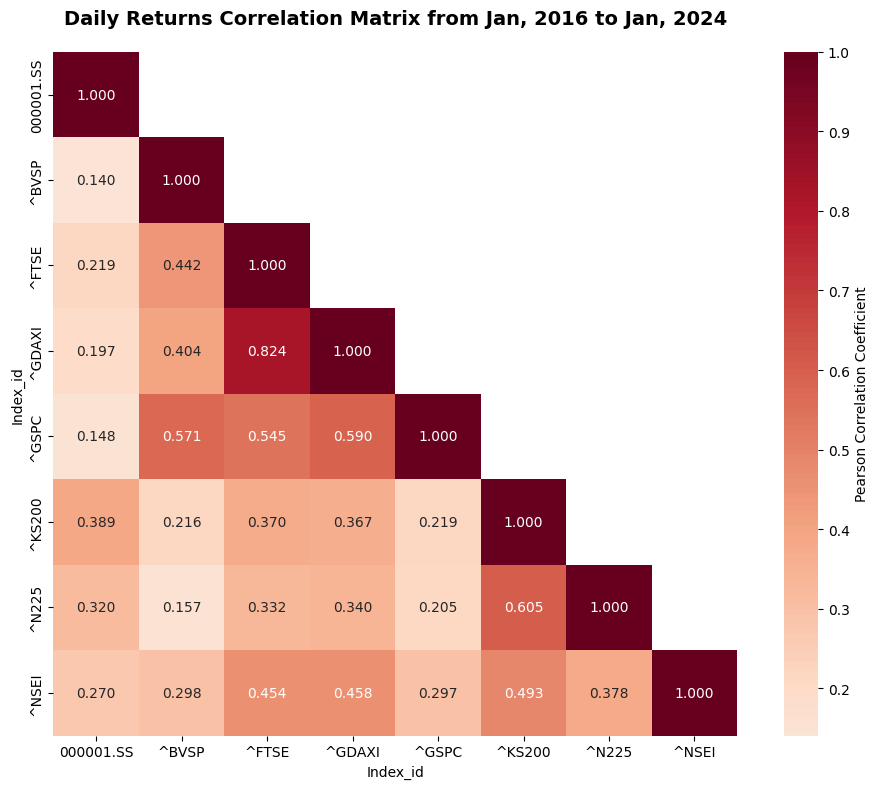

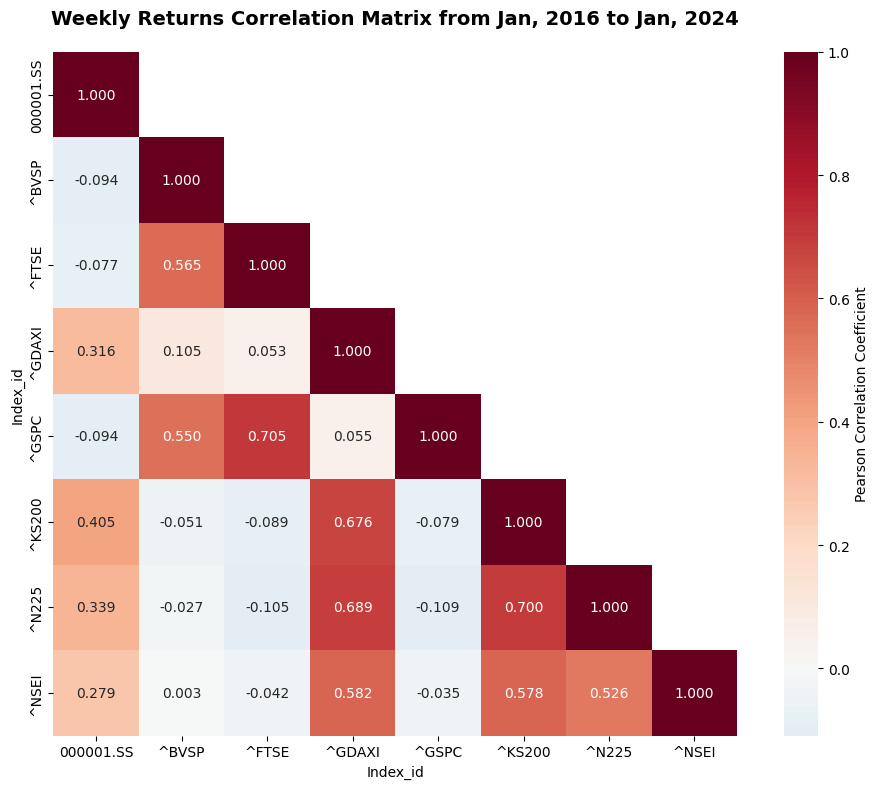

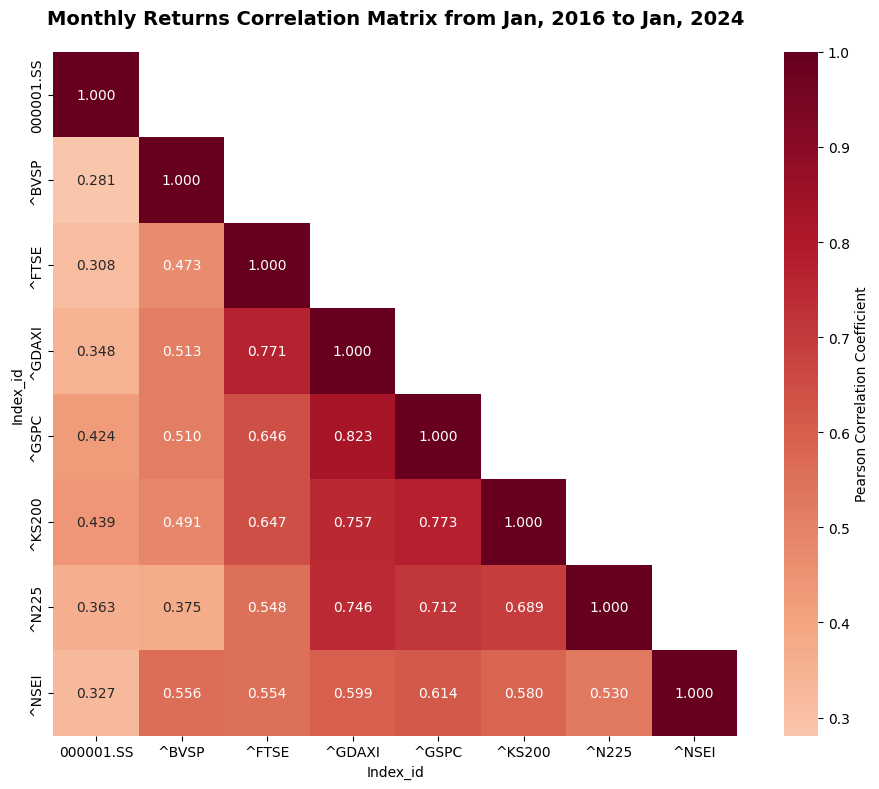

Index_id   000001.SS     ^BVSP     ^FTSE    ^GDAXI     ^GSPC    ^KS200  \
Index_id                                                                 
000001.SS   1.000000  0.281113  0.307591  0.347506  0.424415  0.439242   
^BVSP       0.281113  1.000000  0.472688  0.513289  0.509627  0.490758   
^FTSE       0.307591  0.472688  1.000000  0.770624  0.646117  0.647032   
^GDAXI      0.347506  0.513289  0.770624  1.000000  0.823317  0.756920   
^GSPC       0.424415  0.509627  0.646117  0.823317  1.000000  0.772585   
^KS200      0.439242  0.490758  0.647032  0.756920  0.772585  1.000000   
^N225       0.362607  0.375425  0.548219  0.746063  0.712422  0.688987   
^NSEI       0.326770  0.556497  0.554471  0.599261  0.613627  0.579681   

Index_id      ^N225     ^NSEI  
Index_id                       
000001.SS  0.362607  0.326770  
^BVSP      0.375425  0.556497  
^FTSE      0.548219  0.554471  
^GDAXI     0.746063  0.599261  
^GSPC      0.712422  0.613627  
^KS200     0.688987  0.579681  
^N225      1.000000  0.530092  
^NSEI      0.530092  1.000000

In [9]:
calculate_correlation_matrix(df_index_all_daily, freq='Daily', start_date='2016-01-01', end_date='2024-01-01')
calculate_correlation_matrix(df_index_all_weekly, freq='Weekly', start_date='2016-01-01', end_date='2024-01-01')
calculate_correlation_matrix(df_index_all_mthly, freq='Monthly', start_date='2016-01-01', end_date='2024-01-01')

### Sec 2.4 : Decision on data granularity for further analysis and modelling :
**Going ahead for all analysis we will use daily data:**

We extracted and analysed daily, weekly and monthly data. Going ahead we will use daily returns for the following reasons:

1. Daily returns will provide more datapoints for most of the EDA and modelling related works
2. It's true that daily return data can display more volatility ; however, from the descriptive statistics analysis daily returns data have the minimum std dev as compared to Weekly or monthly data.
3. Between monthly and weekly: we can't go ahead with monthly data for the 8 years period as this may not provide the necessary levels of granularity and sufficient data points for the pre and post pandemic analysis
4. We initially wanted to utilise the weekly data: but after careful analysis we understood that different indices have different week endings date and many markets have different holiday schedules and more over  yfinance's weekly aggregation can be inconsistent across different tickers. Hence weekly data is not very trustworthy.
5. Finally, the correlation assessments between the weekly, daily and monthly data helped us to see that monthly and daily data have similar directions (positive) of correlations between the indices. Whereas on the contrary the weekly data resulted in negative correlation in many cases. This raised further questions on the reliability of the weekly data owing to the already known and discussed issues as above.



## Sec 3 : Pre and post covid analysis

For all our Covid related impact assessment we will divide the time frame into two parts. WHO decalred Covid as a pandemic on March 2020. So, we consider time line from 2016 Jan to 2020 Feb as Pre covid , Mar 2020 to Mar 2021 as during Covid and Apr 2021 to Jan 2024 as Popst Covid. In most of our analysis we will combine during and post Covid time periods into a single panel as Post Covid

In [10]:
## Sec 3 Pre and Post covid impact assessment

pre_covid_start_date='2016-01-01'
pre_covid_end_date='2020-03-01'


post_covid_start_date='2020-04-01'
post_covid_end_date='2024-01-01'



## Sec 3.1 : Pre and post covid trend charts and correaltion analysis

 Daily return plot pre Covid: 
Indices found: ['^GSPC' '^FTSE' '^GDAXI' '^N225' '000001.SS' '^NSEI' '^BVSP' '^KS200']
Number of indices: 8


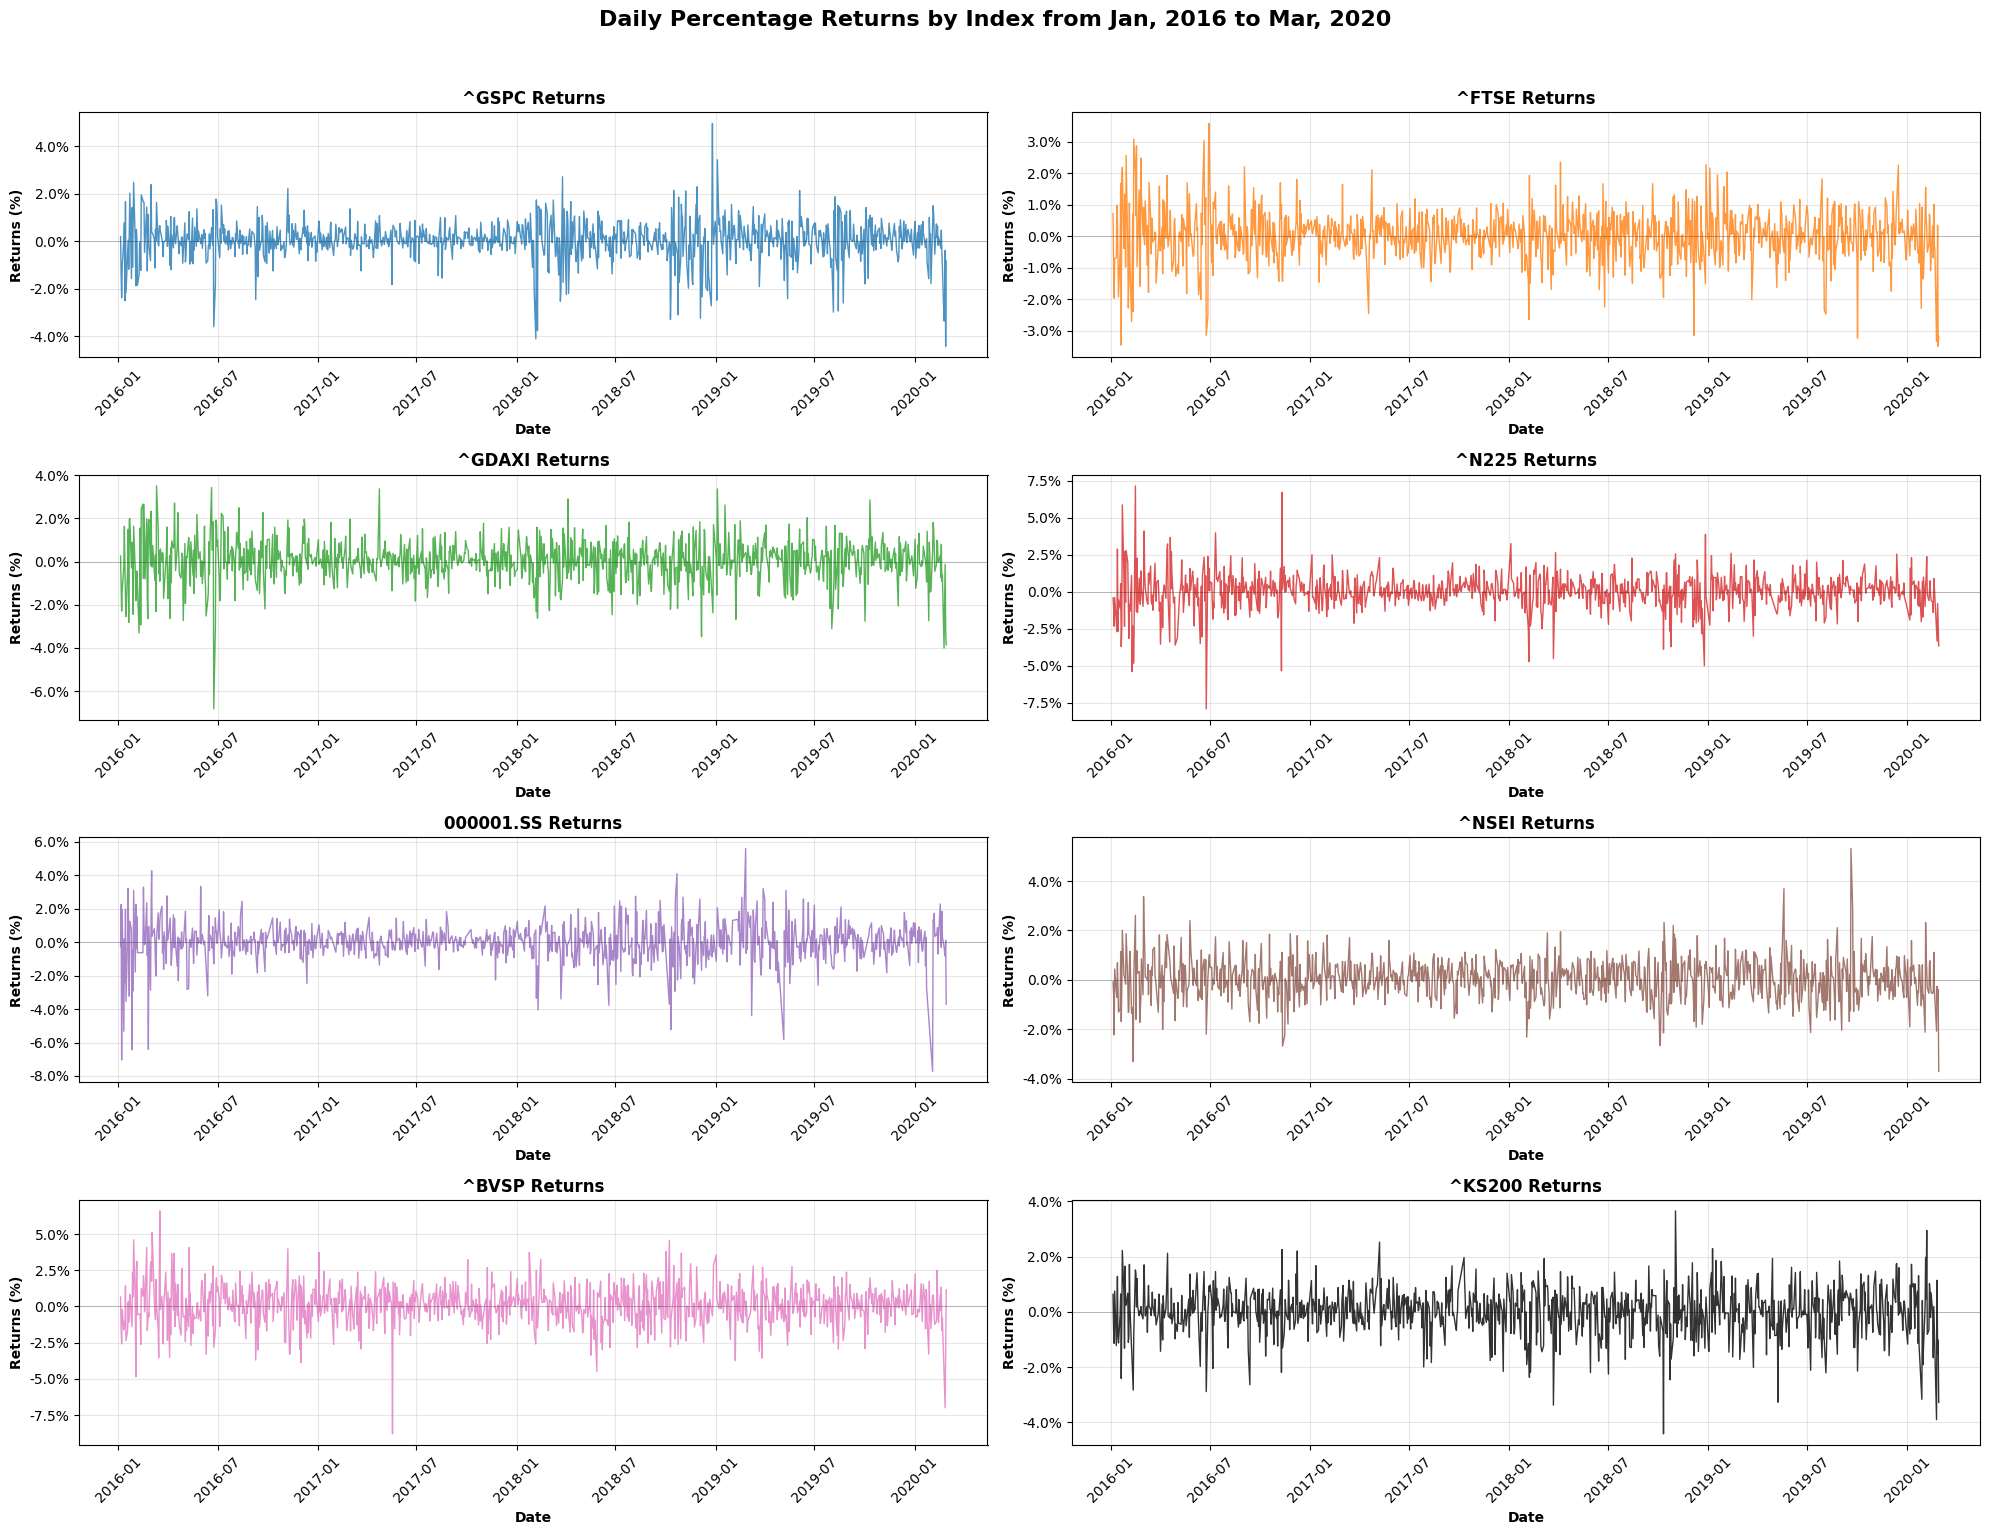

 Daily return plot post Covid: 
Indices found: ['^GSPC' '^FTSE' '^GDAXI' '^N225' '000001.SS' '^NSEI' '^BVSP' '^KS200']
Number of indices: 8


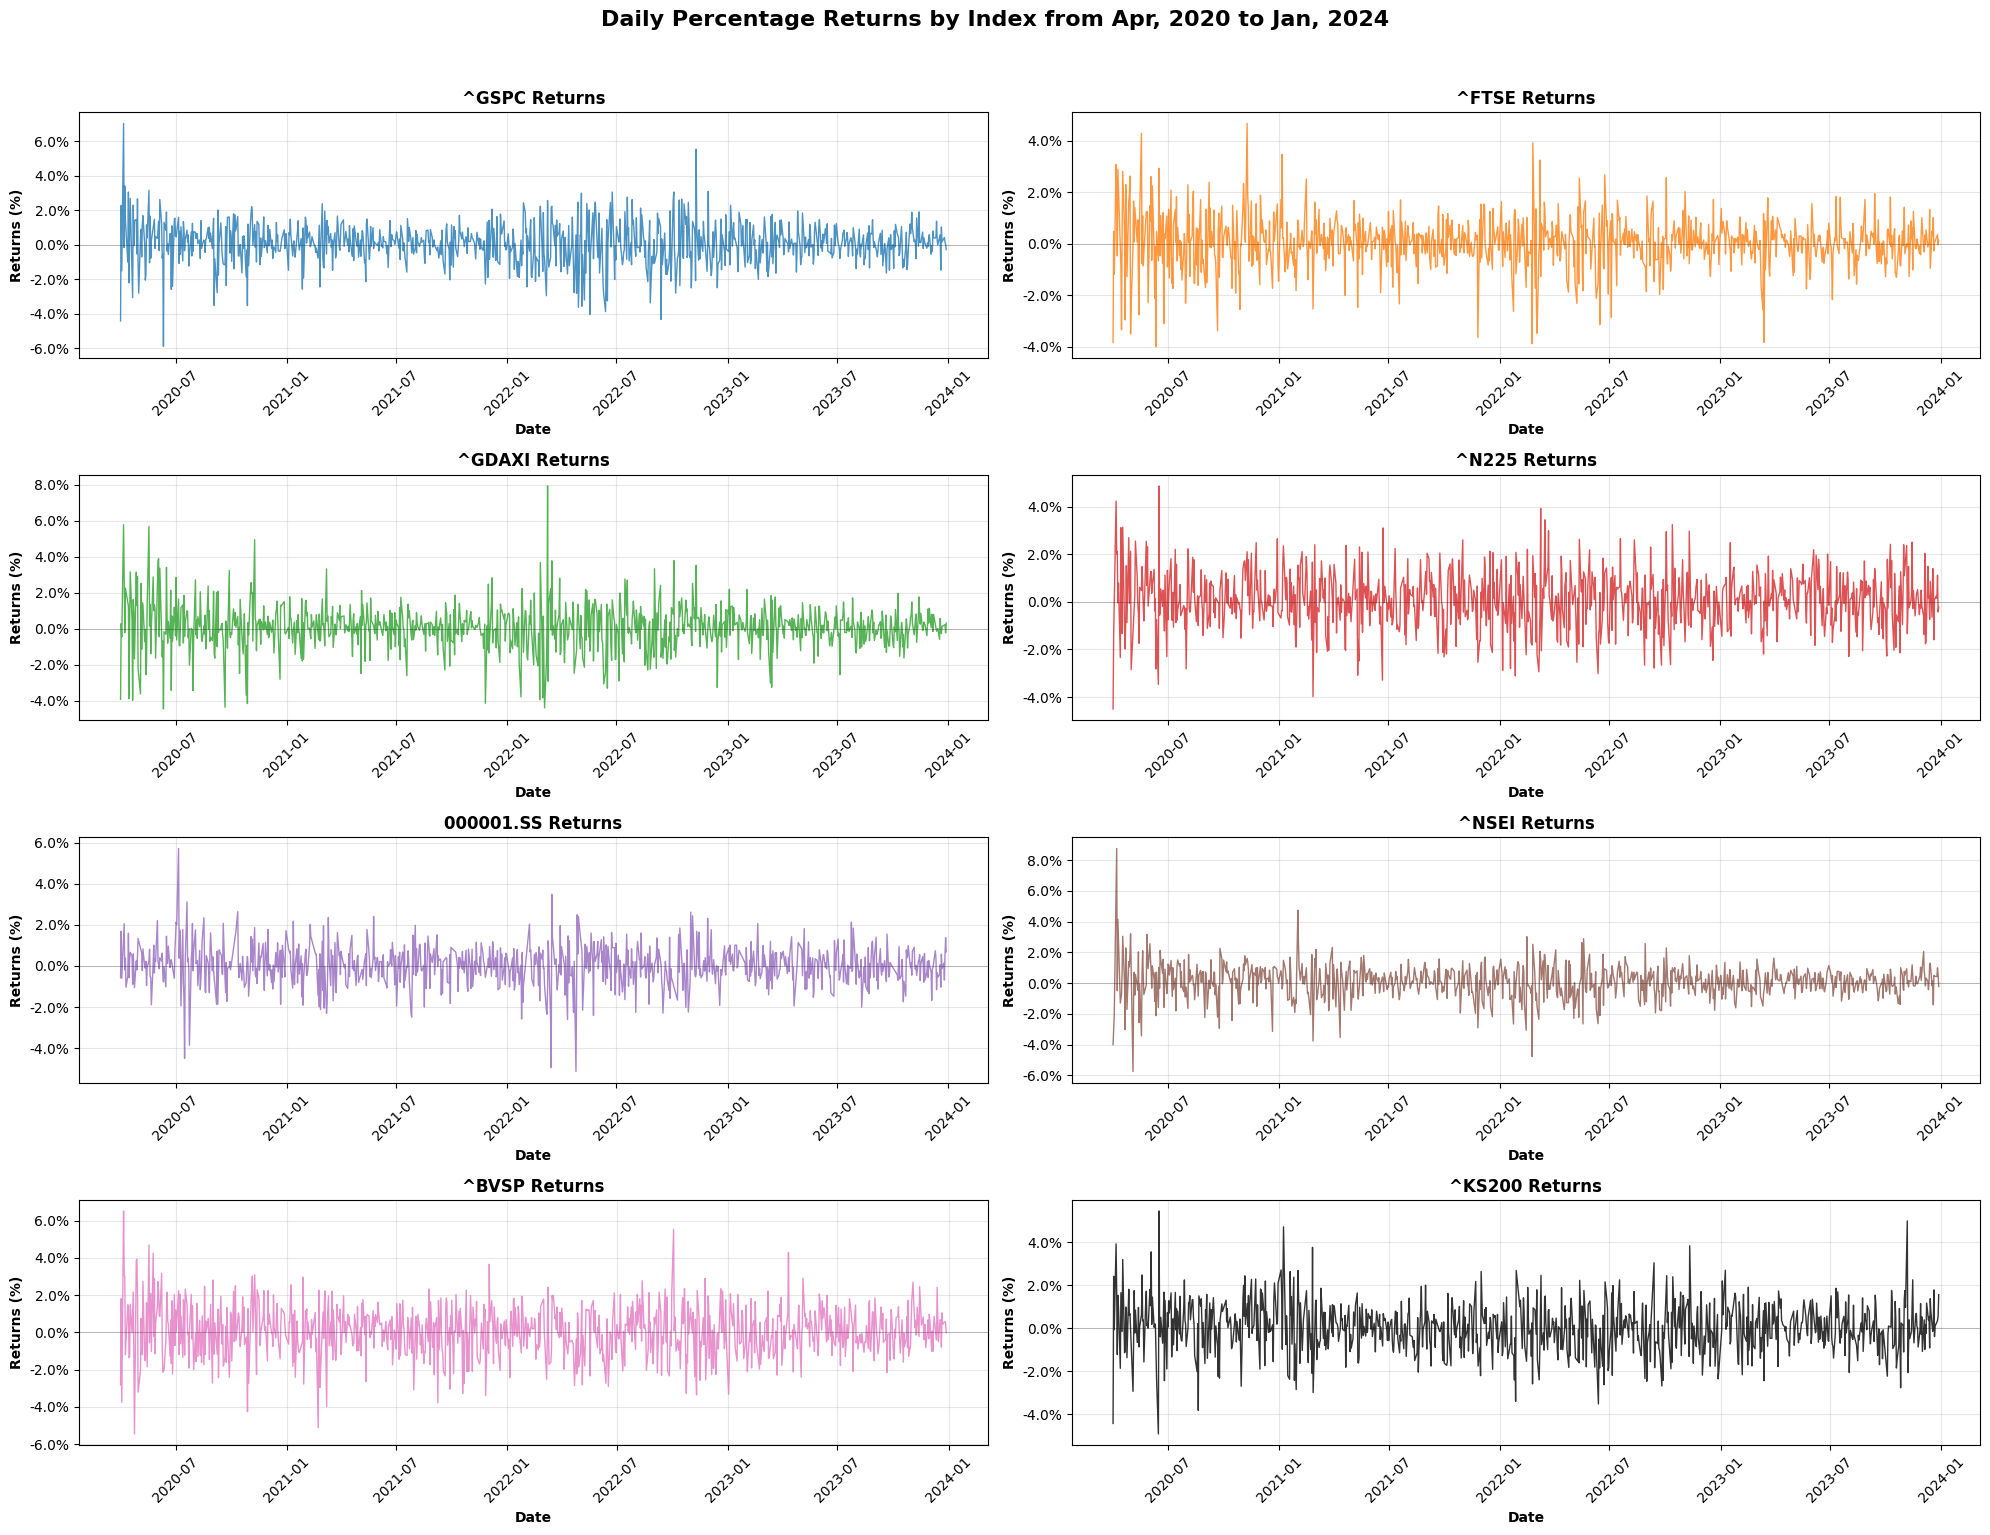

In [11]:
## Trend charts of daily returns pre and post covid:

print( " Daily return plot pre Covid: ")
plot_index_returns(df_index_all_daily , 'Daily', start_date=pre_covid_start_date, end_date=pre_covid_end_date)

print( " Daily return plot post Covid: ")
plot_index_returns(df_index_all_daily , 'Daily', start_date=post_covid_start_date, end_date=post_covid_end_date)


In [12]:
## Descriptive stats : Pre and post covid

print( " Descriptive stats pre Covid: ")
stats_df_daily_pre_covid = calculate_index_stats(
    df=df_index_all_daily,
    start_date=pre_covid_start_date,
    end_date=pre_covid_end_date,
    value_column='pctg_return'
)
display(stats_df_daily_pre_covid)

print( " Descriptive stats post Covid: ")
stats_df_daily_post_covid = calculate_index_stats(
    df=df_index_all_daily,
    start_date=post_covid_start_date,
    end_date=post_covid_end_date,
    value_column='pctg_return'
)
display(stats_df_daily_post_covid)



 Descriptive stats pre Covid: 


Timeline_start Timeline_end  Count       Min      Mean    Median  \
Index_name                                                                    
^GSPC          2016-01-01   2020-03-01   1045 -0.044163  0.000402  0.000598   
^FTSE          2016-01-01   2020-03-01   1052 -0.034945  0.000107  0.000421   
^GDAXI         2016-01-01   2020-03-01   1050 -0.068233  0.000188  0.000684   
^N225          2016-01-01   2020-03-01   1015 -0.079216  0.000206  0.000603   
000001.SS      2016-01-01   2020-03-01   1008 -0.077245 -0.000067  0.000527   
^NSEI          2016-01-01   2020-03-01   1019 -0.037096  0.000390  0.000493   
^BVSP          2016-01-01   2020-03-01   1028 -0.087992  0.000976  0.001233   
^KS200         2016-01-01   2020-03-01   1011 -0.044120  0.000168  0.000570   

                 P75       P95       Max   Std_Dev  Positive_Days_Pct  \
Index_name                                                              
^GSPC       0.004606  0.012673  0.049594  0.008293          55.215311   
^FTSE       0.004659  0.012145  0.035779  0.008223          52.471483   
^GDAXI      0.005690  0.015965  0.035057  0.009985          53.047619   
^N225       0.005896  0.017874  0.071557  0.011988          52.906404   
000001.SS   0.005135  0.017965  0.056007  0.011538          53.273810   
^NSEI       0.005179  0.012991  0.053191  0.008251          53.287537   
^BVSP       0.009042  0.022005  0.065972  0.013796          54.182879   
^KS200      0.004959  0.013423  0.036547  0.008555          53.610287   

            Negative_Days_Pct  Skewness  Skewness_pvalue   Kurtosis  \
Index_name                                                            
^GSPC               44.688995 -0.738307     1.066913e-18   7.936095   
^FTSE               47.528517 -0.257611     7.207771e-04   5.512854   
^GDAXI              46.952381 -0.547103     7.994291e-12   6.195261   
^N225               46.995074 -0.308392     7.760458e-05   9.311677   
000001.SS           46.726190 -1.096532     3.520890e-32  10.547129   
^NSEI               46.516192  0.152914     4.594636e-02   5.937394   
^BVSP               45.719844 -0.317505     4.335044e-05   6.100186   
^KS200              45.994065 -0.556655     9.338034e-12   5.275934   

            Kurtosis_pvalue  
Index_name                   
^GSPC          3.518455e-28  
^FTSE          3.477423e-16  
^GDAXI         5.021437e-20  
^N225          1.362882e-32  
000001.SS      2.658770e-36  
^NSEI          3.854960e-18  
^BVSP          3.692612e-19  
^KS200         2.892155e-14

 Descriptive stats post Covid: 


Timeline_start Timeline_end  Count       Min      Mean    Median  \
Index_name                                                                    
^GSPC          2020-04-01   2024-01-01    944 -0.058944  0.000719  0.000868   
^FTSE          2020-04-01   2024-01-01    943 -0.039879  0.000380  0.000693   
^GDAXI         2020-04-01   2024-01-01    957 -0.044682  0.000623  0.000751   
^N225          2020-04-01   2024-01-01    919 -0.045018  0.000692  0.000929   
000001.SS      2020-04-01   2024-01-01    912 -0.051316  0.000133  0.000078   
^NSEI          2020-04-01   2024-01-01    928 -0.057445  0.001055  0.001431   
^BVSP          2020-04-01   2024-01-01    931 -0.054498  0.000746  0.000522   
^KS200         2020-04-01   2024-01-01    923 -0.049081  0.000516  0.000792   

                 P75       P95       Max   Std_Dev  Positive_Days_Pct  \
Index_name                                                              
^GSPC       0.007550  0.018826  0.070331  0.011821          53.177966   
^FTSE       0.005303  0.016436  0.046751  0.010100          53.870626   
^GDAXI      0.007040  0.019751  0.079213  0.012439          53.082550   
^N225       0.007423  0.020580  0.048826  0.011894          53.210011   
000001.SS   0.005735  0.015938  0.057113  0.009706          50.438596   
^NSEI       0.007187  0.015647  0.087632  0.010523          56.357759   
^BVSP       0.009261  0.022045  0.065216  0.013611          51.772288   
^KS200      0.007708  0.018129  0.054637  0.011735          52.871073   

            Negative_Days_Pct  Skewness  Skewness_pvalue   Kurtosis  \
Index_name                                                            
^GSPC               46.822034 -0.137975         0.082539   5.876000   
^FTSE               46.023330 -0.204427         0.010553   5.661003   
^GDAXI              46.917450  0.163892         0.038235   6.882499   
^N225               46.789989 -0.007192         0.928514   3.697215   
000001.SS           49.561404 -0.202021         0.012903   6.428957   
^NSEI               43.642241  0.135066         0.091869  10.241507   
^BVSP               48.227712 -0.005677         0.943176   4.137383   
^KS200              47.020585  0.073734         0.357263   4.460623   

            Kurtosis_pvalue  
Index_name                   
^GSPC          1.089691e-16  
^FTSE          1.476562e-15  
^GDAXI         1.002869e-21  
^N225          6.424905e-04  
000001.SS      7.632136e-19  
^NSEI          6.819909e-33  
^BVSP          1.311122e-06  
^KS200         1.577505e-08

## Sec 3.2 : Distribution charts of pre and post covid for the 8 major indices

In [13]:


def plot_pre_post_covid_comparison(df_input,
                                  pre_covid_start, pre_covid_end,
                                  post_covid_start, post_covid_end,
                                  date_column='Date',
                                  index_column='Index_id',
                                  value_column='pctg_return',
                                  figsize=(20, 24),
                                  bins=50):
    """
    Plot pre-COVID vs post-COVID kernel density histograms side by side

    Parameters:
    -----------
    df_input : pandas.DataFrame
        Input dataframe containing daily returns data
    pre_covid_start : str
        Start date for pre-COVID period (format: 'YYYY-MM-DD')
    pre_covid_end : str
        End date for pre-COVID period (format: 'YYYY-MM-DD')
    post_covid_start : str
        Start date for post-COVID period (format: 'YYYY-MM-DD')
    post_covid_end : str
        End date for post-COVID period (format: 'YYYY-MM-DD')
    date_column : str, default 'Date'
        Name of the date column
    index_column : str, default 'Index_id'
        Name of the index identifier column
    value_column : str, default 'pctg_return'
        Name of the returns column to plot
    figsize : tuple, default (20, 24)
        Figure size (width, height)
    bins : int, default 50
        Number of bins for histogram

    Returns:
    --------
    None (displays the plot)
    """

    # Make a copy and convert date column
    df = df_input.copy()
    df[date_column] = pd.to_datetime(df[date_column])

    # Filter pre-COVID data
    pre_covid_start_dt = pd.to_datetime(pre_covid_start)
    pre_covid_end_dt = pd.to_datetime(pre_covid_end)
    df_pre_covid = df[(df[date_column] >= pre_covid_start_dt) &
                      (df[date_column] <= pre_covid_end_dt)]

    # Filter post-COVID data
    post_covid_start_dt = pd.to_datetime(post_covid_start)
    post_covid_end_dt = pd.to_datetime(post_covid_end)
    df_post_covid = df[(df[date_column] >= post_covid_start_dt) &
                       (df[date_column] <= post_covid_end_dt)]

    # Format dates for display
    pre_start_formatted = pre_covid_start_dt.strftime('%b %Y')
    pre_end_formatted = pre_covid_end_dt.strftime('%b %Y')
    post_start_formatted = post_covid_start_dt.strftime('%b %Y')
    post_end_formatted = post_covid_end_dt.strftime('%b %Y')

    # Get unique indices
    indices = sorted(df[index_column].unique())
    n_indices = len(indices)

    print(f"Plotting pre vs post COVID comparison for {n_indices} indices")
    print(f"Indices: {indices}")
    print(f"Pre-COVID period: {pre_start_formatted} to {pre_end_formatted}")
    print(f"Post-COVID period: {post_start_formatted} to {post_end_formatted}")

    # Create 8x2 subplot grid
    n_rows = n_indices
    n_cols = 2
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Ensure axes is 2D array
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    # Define colors for each index
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    for i, index in enumerate(indices):
        # Pre-COVID subplot (left column)
        ax_pre = axes[i, 0]

        # Filter data for current index - pre-COVID
        pre_index_data = df_pre_covid[df_pre_covid[index_column] == index][value_column].dropna()

        if len(pre_index_data) > 0:
            # Create histogram
            ax_pre.hist(pre_index_data, bins=bins, density=True, alpha=0.7,
                       color=colors[i % len(colors)], edgecolor='black', linewidth=0.5)

            # Add kernel density estimation curve
            kde_x = np.linspace(pre_index_data.min(), pre_index_data.max(), 200)
            try:
                kde = stats.gaussian_kde(pre_index_data)
                kde_y = kde(kde_x)
                ax_pre.plot(kde_x, kde_y, color='red', linewidth=2, label='KDE')
            except:
                print(f"Warning: Could not compute KDE for {index} pre-COVID")


        # Customize pre-COVID subplot
        ax_pre.set_title(f'{index} - Pre-COVID', fontweight='bold', fontsize=11)
        ax_pre.set_xlabel('Daily Returns', fontsize=9)
        ax_pre.set_ylabel('Density', fontsize=9)
        ax_pre.grid(True, alpha=0.3)
        ax_pre.axvline(x=0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
        ax_pre.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))

        # Post-COVID subplot (right column)
        ax_post = axes[i, 1]

        # Filter data for current index - post-COVID
        post_index_data = df_post_covid[df_post_covid[index_column] == index][value_column].dropna()

        if len(post_index_data) > 0:
            # Create histogram
            ax_post.hist(post_index_data, bins=bins, density=True, alpha=0.7,
                        color=colors[i % len(colors)], edgecolor='black', linewidth=0.5)

            # Add kernel density estimation curve
            kde_x = np.linspace(post_index_data.min(), post_index_data.max(), 200)
            try:
                kde = stats.gaussian_kde(post_index_data)
                kde_y = kde(kde_x)
                ax_post.plot(kde_x, kde_y, color='red', linewidth=2, label='KDE')
            except:
                print(f"Warning: Could not compute KDE for {index} post-COVID")



        # Customize post-COVID subplot
        ax_post.set_title(f'{index} - Post-COVID', fontweight='bold', fontsize=11)
        ax_post.set_xlabel('Daily Returns', fontsize=9)
        ax_post.set_ylabel('Density', fontsize=9)
        ax_post.grid(True, alpha=0.3)
        ax_post.axvline(x=0, color='gray', linestyle='-', alpha=0.5, linewidth=1)
        ax_post.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))

        # Add legend only to first row
        if i == 0:
            ax_pre.legend(loc='upper right', fontsize=8)
            ax_post.legend(loc='upper right', fontsize=8)

    # Add column headers
    axes[0, 0].text(0.5, 1.15, f'Pre-COVID ({pre_start_formatted} to {pre_end_formatted})',
                    transform=axes[0, 0].transAxes, ha='center', va='bottom',
                    fontsize=14, fontweight='bold')
    axes[0, 1].text(0.5, 1.15, f'Post-COVID ({post_start_formatted} to {post_end_formatted})',
                    transform=axes[0, 1].transAxes, ha='center', va='bottom',
                    fontsize=14, fontweight='bold')

    # Main title
    main_title = 'Return Distribution Comparison: Pre-COVID vs Post-COVID'
    fig.suptitle(main_title, fontsize=18, fontweight='bold', y=0.98)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.3)  # Make room for titles and spacing
    plt.show()




Plotting pre vs post COVID comparison for 8 indices
Indices: ['000001.SS', '^BVSP', '^FTSE', '^GDAXI', '^GSPC', '^KS200', '^N225', '^NSEI']
Pre-COVID period: Jan 2016 to Mar 2020
Post-COVID period: Apr 2020 to Jan 2024


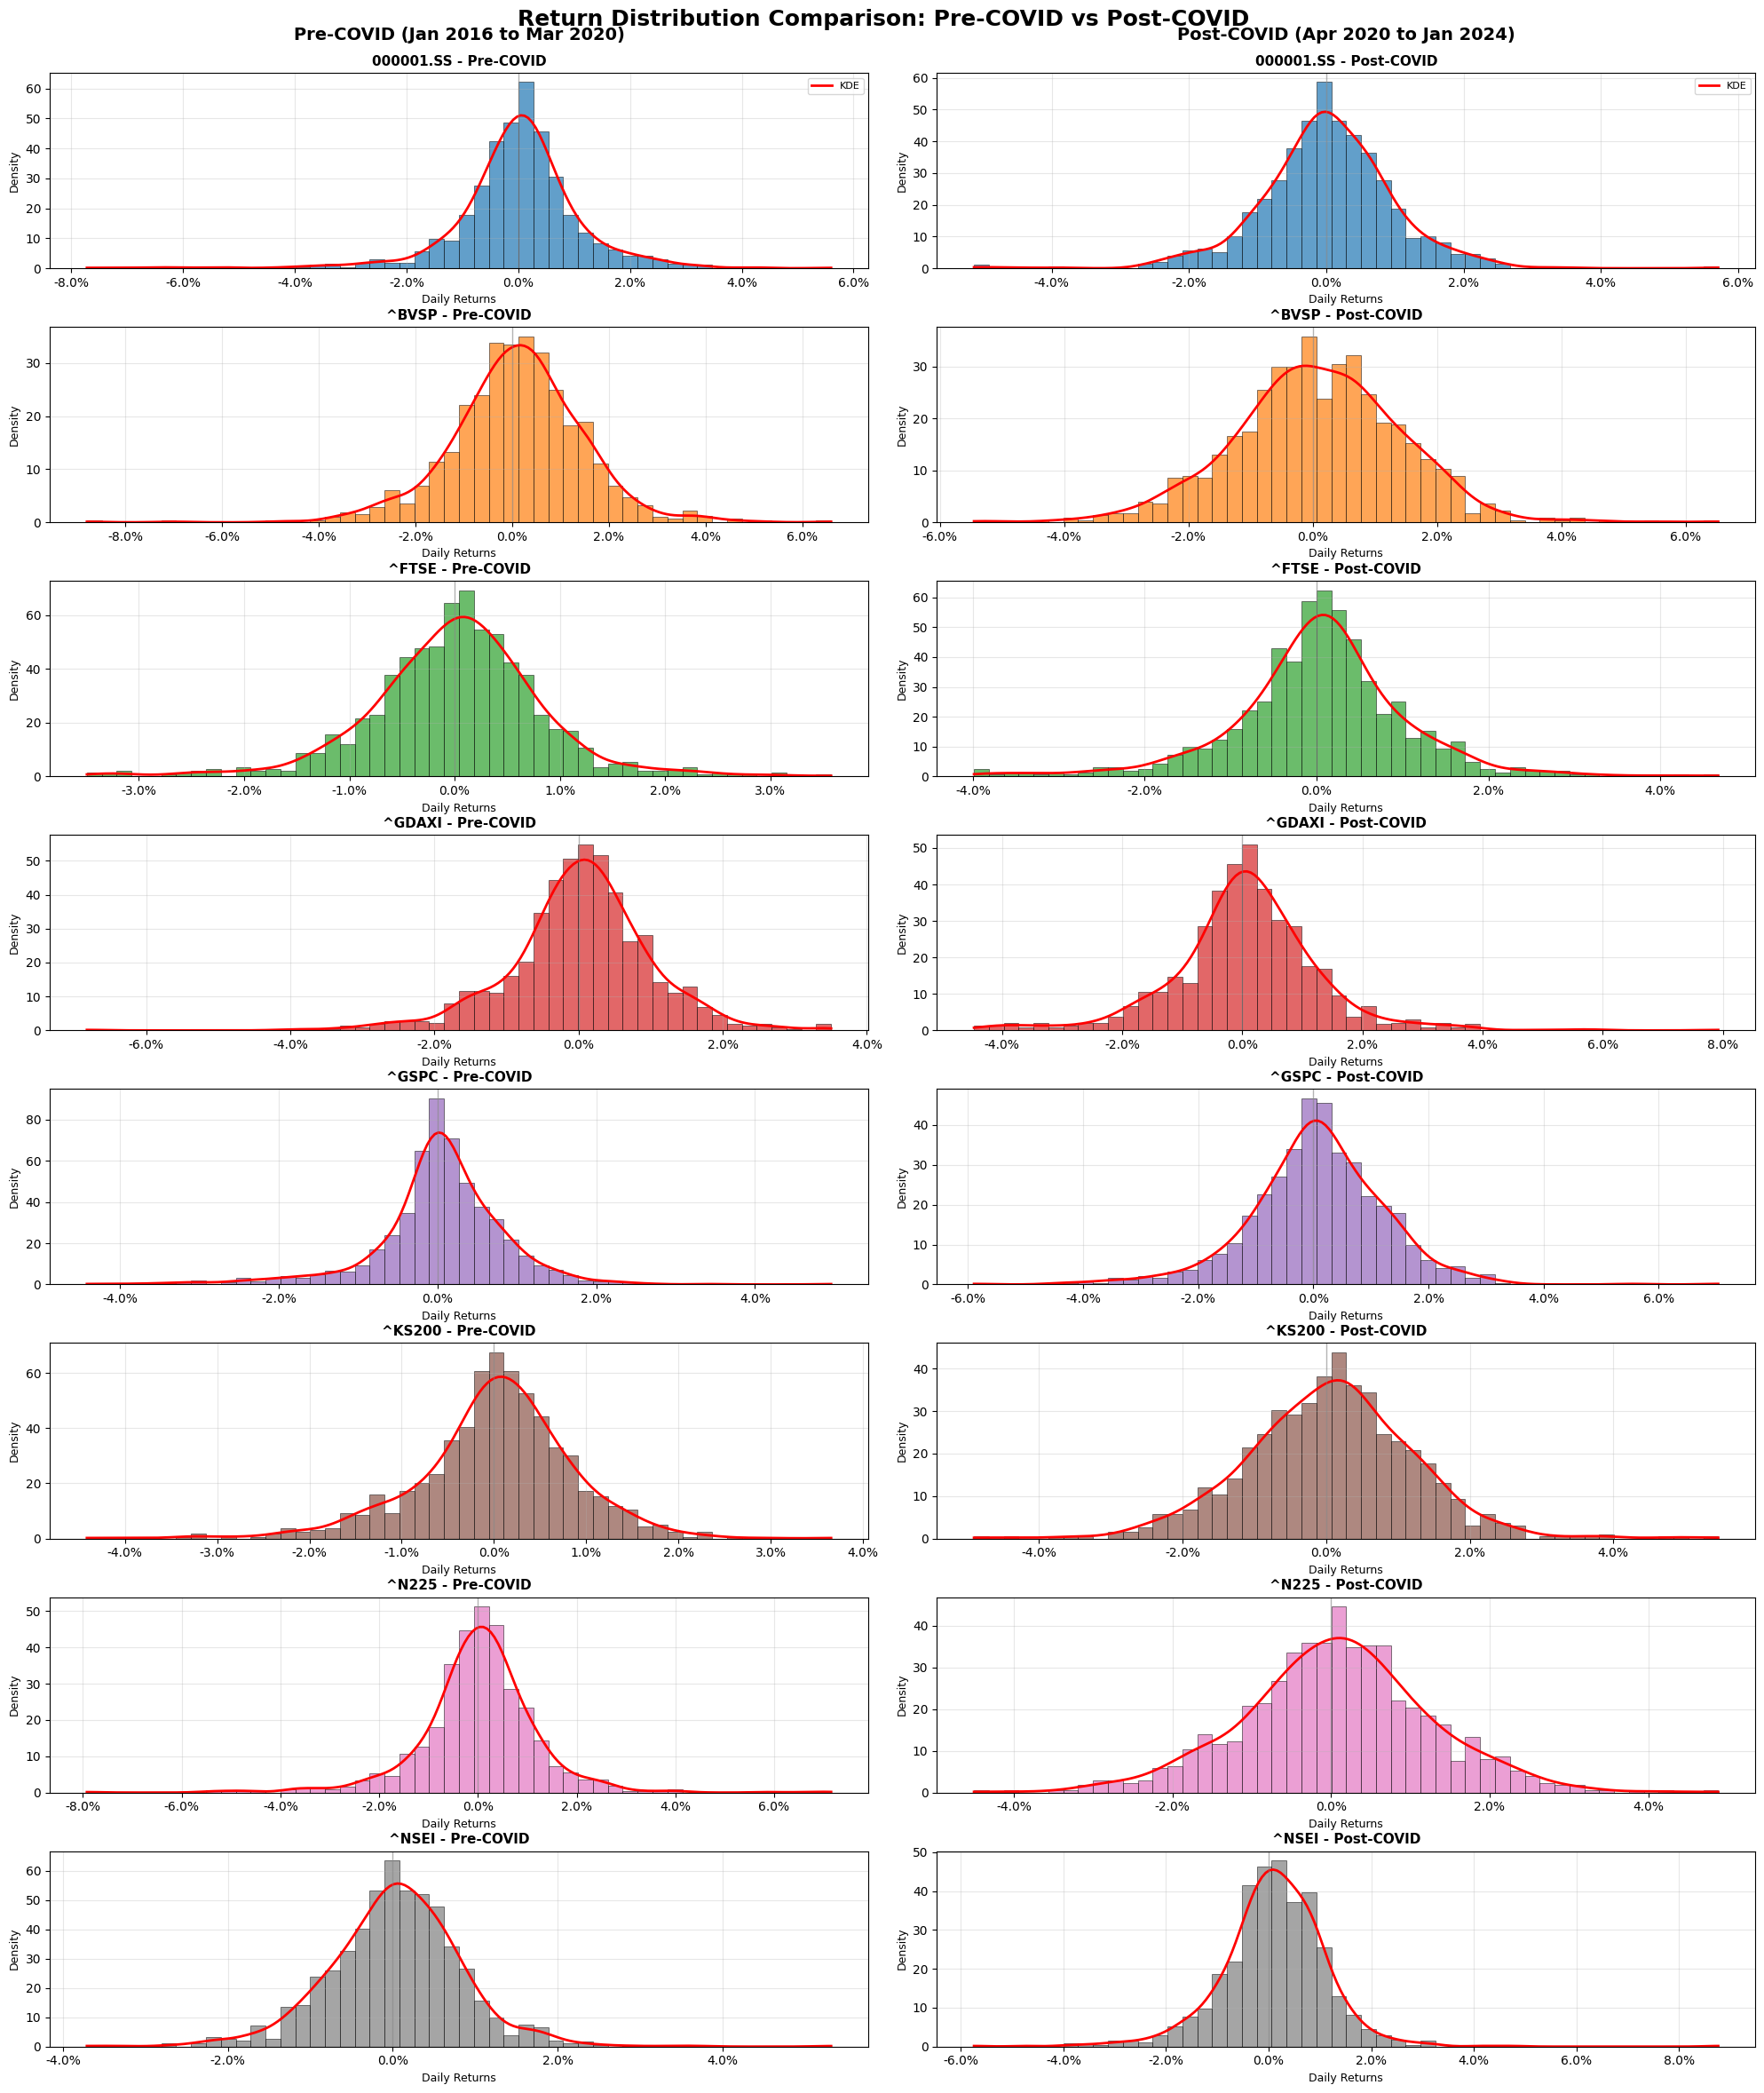

In [14]:
plot_pre_post_covid_comparison(df_index_all_daily, pre_covid_start=pre_covid_start_date, pre_covid_end=pre_covid_end_date,post_covid_start=post_covid_start_date, post_covid_end=post_covid_end_date)



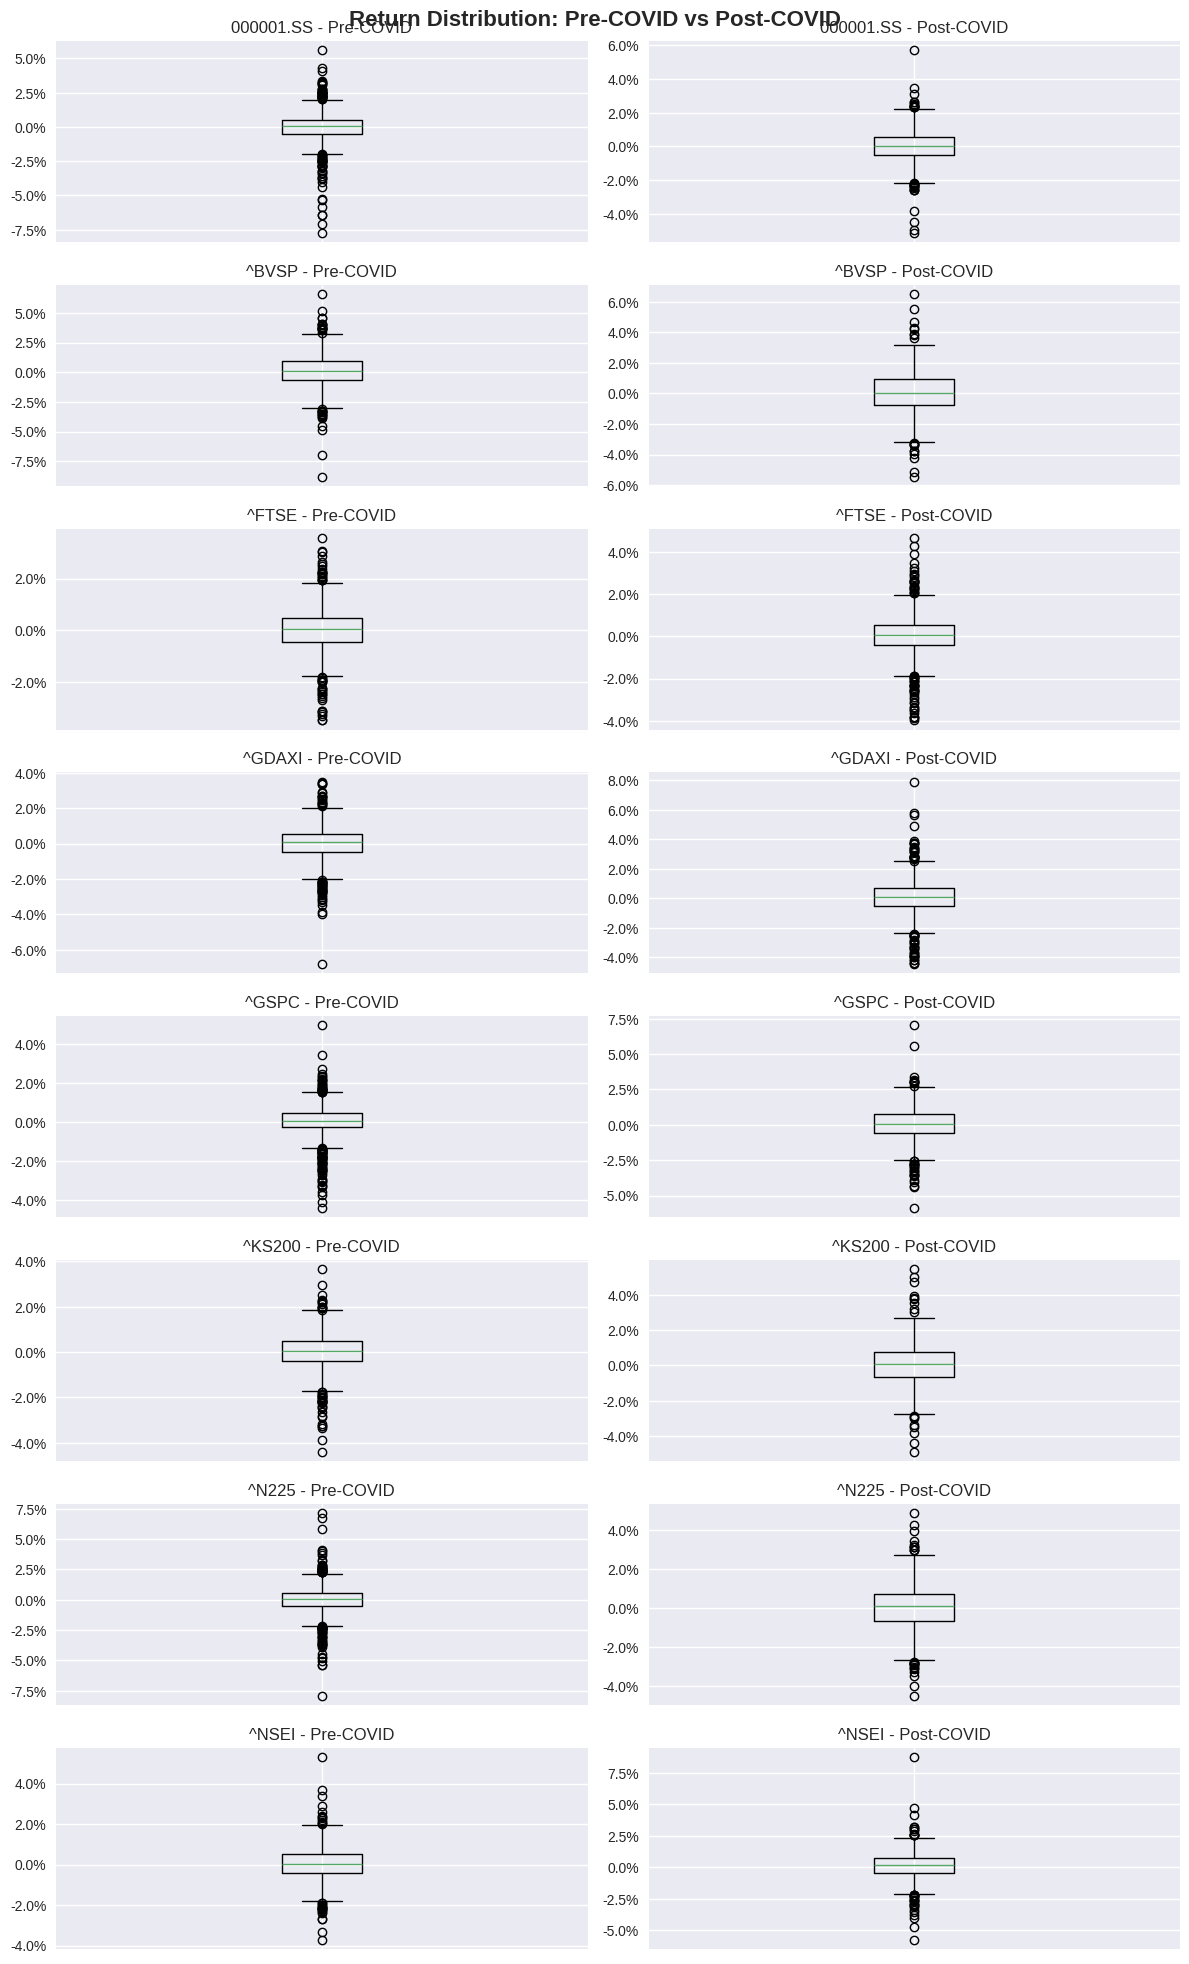


Outlier Summary:
    Index  Pre_COVID_Observations  Pre_COVID_Outliers  Post_COVID_Observations  Post_COVID_Outliers  Pre_COVID_Outlier_Rate  Post_COVID_Outlier_Rate
000001.SS                    1008                  74                      912                   29                    7.34                     3.18
    ^BVSP                    1028                  32                      931                   19                    3.11                     2.04
    ^FTSE                    1052                  45                      943                   58                    4.28                     6.15
   ^GDAXI                    1050                  50                      957                   57                    4.76                     5.96
    ^GSPC                    1045                  83                      944                   32                    7.94                     3.39
   ^KS200                    1011                  42                      923          

Index  Pre_COVID_Observations  Pre_COVID_Outliers  \
0  000001.SS                    1008                  74   
1      ^BVSP                    1028                  32   
2      ^FTSE                    1052                  45   
3     ^GDAXI                    1050                  50   
4      ^GSPC                    1045                  83   
5     ^KS200                    1011                  42   
6      ^N225                    1015                  68   
7      ^NSEI                    1019                  29   

   Post_COVID_Observations  Post_COVID_Outliers  Pre_COVID_Outlier_Rate  \
0                      912                   29                    7.34   
1                      931                   19                    3.11   
2                      943                   58                    4.28   
3                      957                   57                    4.76   
4                      944                   32                    7.94   
5                      923                   17                    4.15   
6                      919                   25                    6.70   
7                      928                   35                    2.85   

   Post_COVID_Outlier_Rate  
0                     3.18  
1                     2.04  
2                     6.15  
3                     5.96  
4                     3.39  
5                     1.84  
6                     2.72  
7                     3.77

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pre_post_covid_boxplots(df_input,
                                pre_covid_start, pre_covid_end,
                                post_covid_start, post_covid_end,
                                date_column='Date',
                                index_column='Index_id',
                                value_column='pctg_return',
                                figsize=(12, 20)):
    """
    Simple boxplot comparison: Pre-COVID vs Post-COVID for 8 indices
    Returns a dataframe with outlier counts for each index and period
    """

    # Prepare data
    df = df_input.copy()
    df[date_column] = pd.to_datetime(df[date_column])

    # Filter data by periods
    df_pre_covid = df[(df[date_column] >= pd.to_datetime(pre_covid_start)) &
                      (df[date_column] <= pd.to_datetime(pre_covid_end))]

    df_post_covid = df[(df[date_column] >= pd.to_datetime(post_covid_start)) &
                       (df[date_column] <= pd.to_datetime(post_covid_end))]

    # Get indices (limit to 8)
    indices = sorted(df[index_column].unique())[:8]

    # Function to count outliers using IQR method
    def count_outliers(data):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        return len(outliers)

    # Store outlier counts
    outlier_data = []

    # Create subplots
    fig, axes = plt.subplots(8, 2, figsize=figsize)

    for i, index in enumerate(indices):
        # Get data for current index
        pre_data = df_pre_covid[df_pre_covid[index_column] == index][value_column].dropna()
        post_data = df_post_covid[df_post_covid[index_column] == index][value_column].dropna()

        # Count outliers
        pre_outliers = count_outliers(pre_data)
        post_outliers = count_outliers(post_data)

        # Store outlier counts
        outlier_data.append({
            'Index': index,
            'Pre_COVID_Observations': len(pre_data),
            'Pre_COVID_Outliers': pre_outliers,
            'Post_COVID_Observations': len(post_data),
            'Post_COVID_Outliers': post_outliers
        })

        # Pre-COVID boxplot (left)
        axes[i, 0].boxplot([pre_data])
        axes[i, 0].set_title(f'{index} - Pre-COVID')
        axes[i, 0].set_xticklabels([''])
        axes[i, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

        # Post-COVID boxplot (right)
        axes[i, 1].boxplot([post_data])
        axes[i, 1].set_title(f'{index} - Post-COVID')
        axes[i, 1].set_xticklabels([''])
        axes[i, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

    plt.suptitle('Return Distribution: Pre-COVID vs Post-COVID', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Create and return outlier summary dataframe
    outlier_df = pd.DataFrame(outlier_data)
    outlier_df['Pre_COVID_Outlier_Rate'] = (outlier_df['Pre_COVID_Outliers'] / outlier_df['Pre_COVID_Observations'] * 100).round(2)
    outlier_df['Post_COVID_Outlier_Rate'] = (outlier_df['Post_COVID_Outliers'] / outlier_df['Post_COVID_Observations'] * 100).round(2)

    print("\nOutlier Summary:")
    print(outlier_df.to_string(index=False))

    return outlier_df


# Example usage:
# outlier_summary = plot_pre_post_covid_boxplots(df_daily_returns,
#                                               pre_covid_start='2018-01-01',
#                                               pre_covid_end='2020-02-29',
#                                               post_covid_start='2020-06-01',
#                                               post_covid_end='2022-12-31')


# Example usage:
plot_pre_post_covid_boxplots(df_index_all_daily,pre_covid_start=pre_covid_start_date, pre_covid_end=pre_covid_end_date,post_covid_start=post_covid_start_date, post_covid_end=post_covid_end_date)

## Sec 3.3 : Compare pre and post covid 19 descriptive statistics to identify changes

In [15]:

def compare_covid_statistics(df_input,
                           pre_covid_start, pre_covid_end,
                           post_covid_start, post_covid_end,
                           date_column='Date',
                           index_column='Index_id',
                           value_column='pctg_return'):
    """
    Generate comparative statistics table for pre vs post COVID periods

    Parameters:
    -----------
    df_input : pandas.DataFrame
        Input dataframe containing daily returns data
    pre_covid_start : str
        Start date for pre-COVID period
    pre_covid_end : str
        End date for pre-COVID period
    post_covid_start : str
        Start date for post-COVID period
    post_covid_end : str
        End date for post-COVID period
    date_column : str, default 'Date'
        Name of the date column
    index_column : str, default 'Index_id'
        Name of the index identifier column
    value_column : str, default 'pctg_return'
        Name of the returns column

    Returns:
    --------
    pandas.DataFrame
        Comparative statistics table
    """

    # Make a copy and convert date column
    df = df_input.copy()
    df[date_column] = pd.to_datetime(df[date_column])

    # Filter data
    pre_covid_start_dt = pd.to_datetime(pre_covid_start)
    pre_covid_end_dt = pd.to_datetime(pre_covid_end)
    post_covid_start_dt = pd.to_datetime(post_covid_start)
    post_covid_end_dt = pd.to_datetime(post_covid_end)

    df_pre = df[(df[date_column] >= pre_covid_start_dt) &
                (df[date_column] <= pre_covid_end_dt)]
    df_post = df[(df[date_column] >= post_covid_start_dt) &
                 (df[date_column] <= post_covid_end_dt)]

    results = []

    for index in sorted(df[index_column].unique()):
        pre_data = df_pre[df_pre[index_column] == index][value_column].dropna()
        post_data = df_post[df_post[index_column] == index][value_column].dropna()

        if len(pre_data) == 0 or len(post_data) == 0:
            continue

        # Calculate statistics for both periods
        result = {
            'Index': index,
            'Pre_Min': pre_data.min(),
            'Post_Min': post_data.min(),
            'Pre_Max': pre_data.max(),
            'Post_Max': post_data.max(),
            'Pre_Mean': pre_data.mean(),
            'Post_Mean': post_data.mean(),
            'Pre_Std': pre_data.std(),
            'Post_Std': post_data.std(),
            'Pre_Skewness': stats.skew(pre_data),
            'Post_Skewness': stats.skew(post_data),
            'Pre_Kurtosis': stats.kurtosis(pre_data, fisher=True),
            'Post_Kurtosis': stats.kurtosis(post_data, fisher=True),
            'Mean_Change': post_data.mean() - pre_data.mean(),
            'Volatility_Change': post_data.std() - pre_data.std(),
            'Volatility_Ratio': post_data.std() / pre_data.std()
        }

        results.append(result)

    results_df = pd.DataFrame(results)
    results_df = results_df.set_index('Index')

    return results_df

compare_covid_statistics(df_index_all_daily, pre_covid_start=pre_covid_start_date, pre_covid_end=pre_covid_end_date,post_covid_start=post_covid_start_date, post_covid_end=post_covid_end_date)

Pre_Min  Post_Min   Pre_Max  Post_Max  Pre_Mean  Post_Mean  \
Index                                                                    
000001.SS -0.077245 -0.051316  0.056007  0.057113 -0.000067   0.000133   
^BVSP     -0.087992 -0.054498  0.065972  0.065216  0.000976   0.000746   
^FTSE     -0.034945 -0.039879  0.035779  0.046751  0.000107   0.000380   
^GDAXI    -0.068233 -0.044682  0.035057  0.079213  0.000188   0.000623   
^GSPC     -0.044163 -0.058944  0.049594  0.070331  0.000402   0.000719   
^KS200    -0.044120 -0.049081  0.036547  0.054637  0.000168   0.000516   
^N225     -0.079216 -0.045018  0.071557  0.048826  0.000206   0.000692   
^NSEI     -0.037096 -0.057445  0.053191  0.087632  0.000390   0.001055   

            Pre_Std  Post_Std  Pre_Skewness  Post_Skewness  Pre_Kurtosis  \
Index                                                                      
000001.SS  0.011538  0.009706     -1.096532      -0.202021      7.547129   
^BVSP      0.013796  0.013611     -0.317505      -0.005677      3.100186   
^FTSE      0.008223  0.010100     -0.257611      -0.204427      2.512854   
^GDAXI     0.009985  0.012439     -0.547103       0.163892      3.195261   
^GSPC      0.008293  0.011821     -0.738307      -0.137975      4.936095   
^KS200     0.008555  0.011735     -0.556655       0.073734      2.275934   
^N225      0.011988  0.011894     -0.308392      -0.007192      6.311677   
^NSEI      0.008251  0.010523      0.152914       0.135066      2.937394   

           Post_Kurtosis  Mean_Change  Volatility_Change  Volatility_Ratio  
Index                                                                       
000001.SS       3.428957     0.000200          -0.001832          0.841208  
^BVSP           1.137383    -0.000230          -0.000185          0.986586  
^FTSE           2.661003     0.000273           0.001877          1.228250  
^GDAXI          3.882499     0.000435           0.002454          1.245816  
^GSPC           2.876000     0.000317           0.003529          1.425495  
^KS200          1.460623     0.000348           0.003180          1.371727  
^N225           0.697215     0.000485          -0.000095          0.992113  
^NSEI           7.241507     0.000665           0.002272          1.275289

# Sec 3.4 : Regime shift anlysis :  
- Regime shift has been checked using two metholodogies - Using rolling mean returns for all the 8 indices over a period of 1 years (i.e. 252 trading days)
- Fisher Z test to assess the correlation shift from pre covid to post covid

### Sec 3.4.1 : Regime shift analysis using 1 year rolling mean :

In [16]:
## Plot rolling window means :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming your dataframe is named 'df' with columns: 'Date', 'Index', 'pctg_returns'
# If your column names are different, adjust accordingly

def calculate_rolling_mean_analysis(df):
    """
    Calculate 52-week rolling window mean for stacked index returns data

    Parameters:
    df: DataFrame with columns ['Date', 'Index', 'pctg_returns']
    window_weeks: Number of weeks for rolling window (default: 52)

    Returns:
    DataFrame with rolling means for each index
    """

    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert weeks to days (approximately)
    window_days = 252

    # Sort by Index and Date to ensure proper ordering
    df = df.sort_values(['Index_id', 'Date']).reset_index(drop=True)

    # Calculate rolling mean for each index
    rolling_means = []

    for index_name in df['Index_id'].unique():
        index_data = df[df['Index_id'] == index_name].copy()
        index_data = index_data.sort_values('Date')

        # Calculate rolling mean
        index_data['rolling_mean_1_yr'] = index_data['pctg_return'].rolling(
            window=window_days,
            min_periods=int(window_days * 0.7)  # Require at least 70% of observations
        ).mean()

        rolling_means.append(index_data)

    # Combine all indices
    result_df = pd.concat(rolling_means, ignore_index=True)

    return result_df

def plot_rolling_means(df_with_rolling, pre_covid_start='2016-01-01',
                      pre_covid_end='2020-03-01', post_covid_start='2020-04-01',
                      post_covid_end='2024-01-01'):
    """
    Create visualizations for the rolling window analysis
    """

    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(4, 2, figsize=(20, 12))
    axes = axes.flatten()

    # Define colors for different periods
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f']

    indices = df_with_rolling['Index_id'].unique()

    for i, index_name in enumerate(indices):
        ax = axes[i]
        index_data = df_with_rolling[df_with_rolling['Index_id'] == index_name].copy()
        index_data = index_data.sort_values('Date')

        # Plot rolling mean (bolder)
        ax.plot(index_data['Date'], index_data['rolling_mean_1_yr'],
                color=colors[i % len(colors)], linewidth=2,
                label='1 Year Rolling Mean')

        # Add vertical lines for COVID periods
        ax.axvline(pd.to_datetime(pre_covid_end), color='red',
                  linestyle='--', alpha=0.7, label='COVID Starts')


        ax.set_title(f'{index_name} - 1 year Rolling Mean', fontsize=12, fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns (%)')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)

        # Rotate x-axis labels
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.suptitle('1 year Rolling Window Mean Analysis - Regime Shift Study',
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()



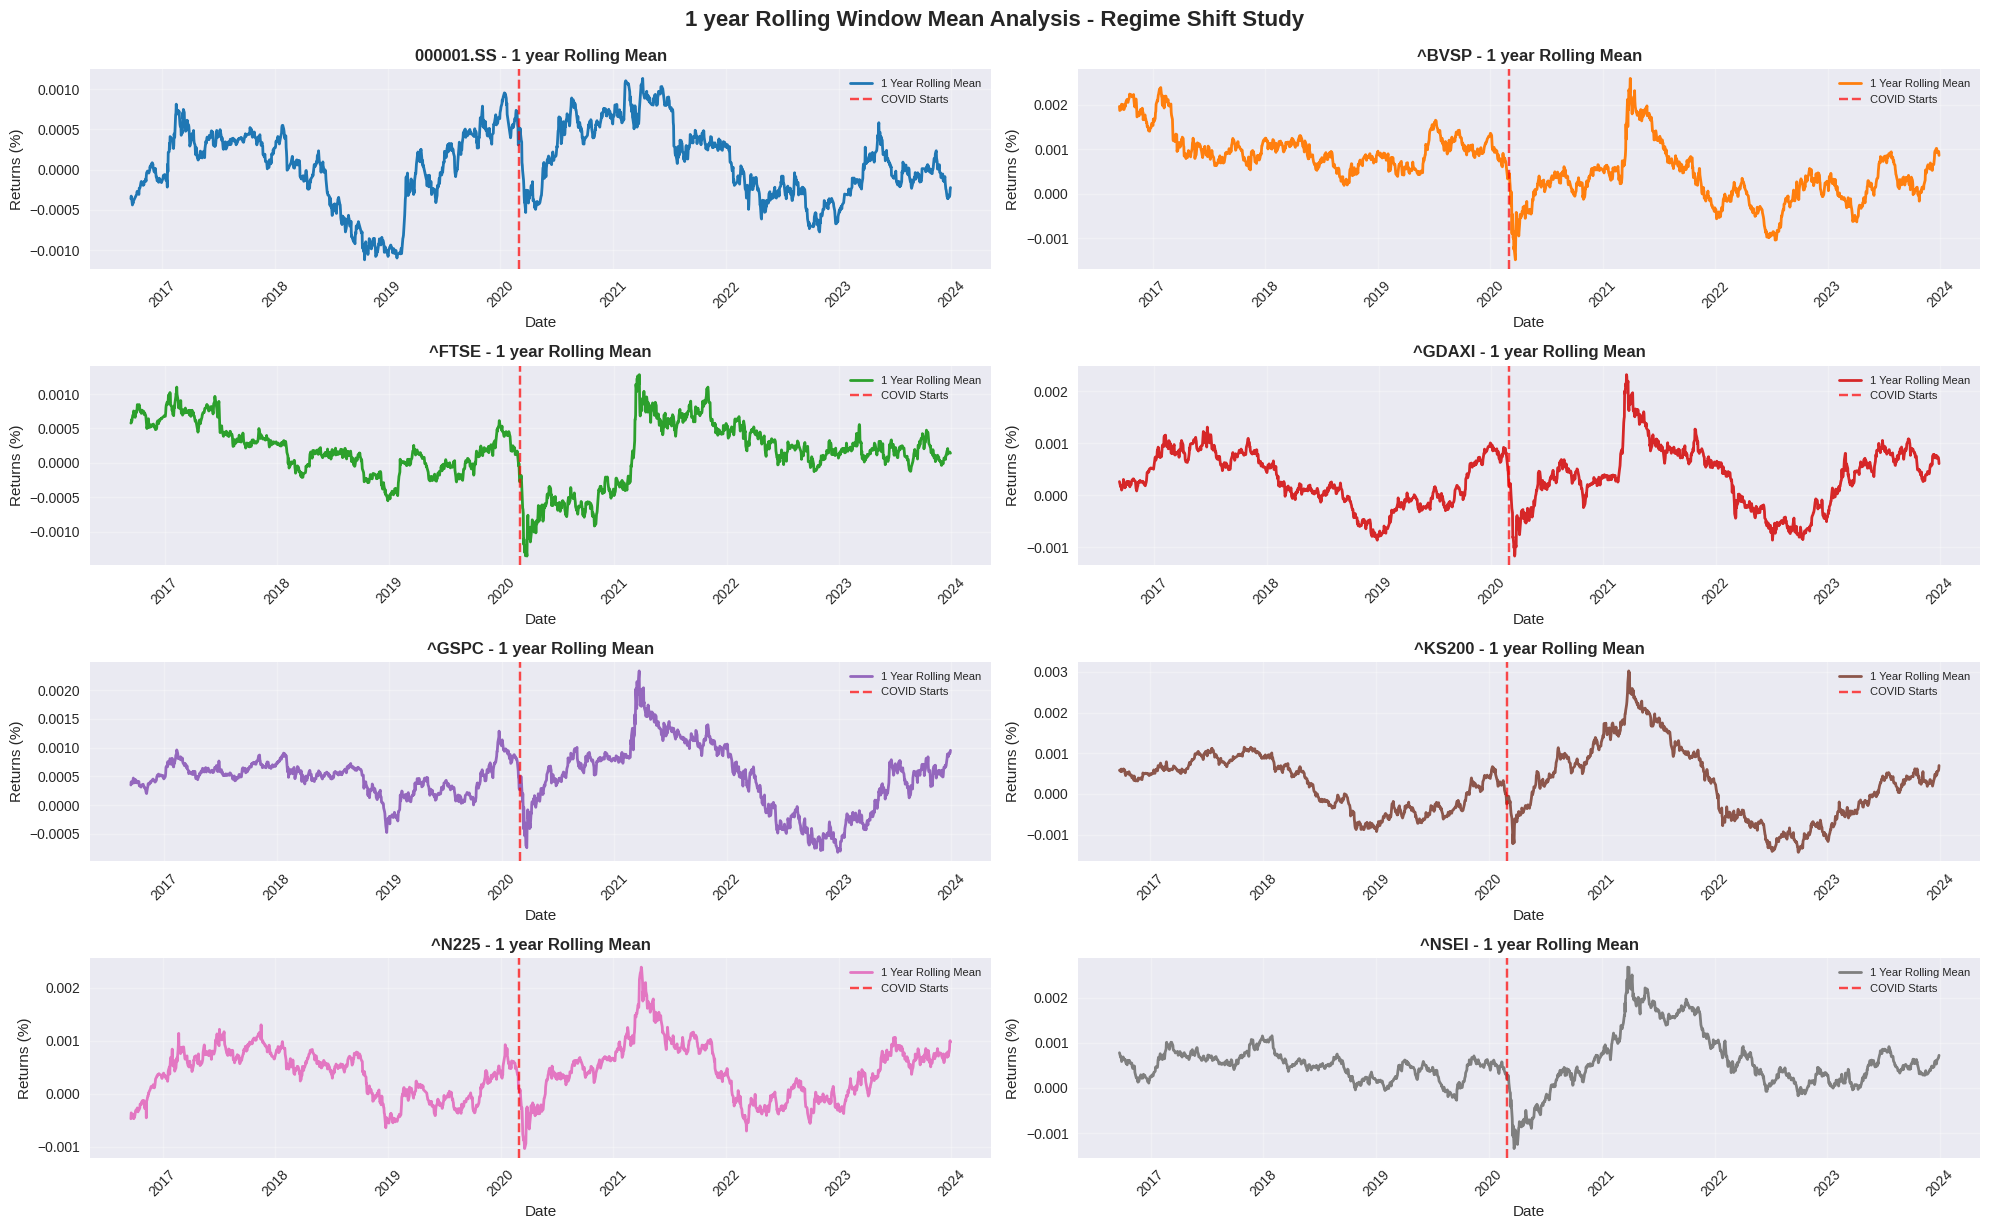

In [17]:
df_rolling_means = calculate_rolling_mean_analysis(df_index_all_daily)
plot_rolling_means(df_rolling_means)

In [18]:
def get_date_of_highest_rolling_mean(df):
    """
    Finds the date (month and year) of the highest rolling mean for each index.

    Args:
        df: DataFrame with 'Index_id', 'Date', and 'rolling_mean_1_yr' columns.

    Returns:
        DataFrame with 'Index_id', 'Highest_Rolling_Mean', and 'Date' (month and year).
    """
    highest_rolling_mean_dates = []
    for index_id, group in df.groupby('Index_id'):
        max_rolling_mean_row = group.loc[group['rolling_mean_1_yr'].idxmax()]
        highest_rolling_mean_dates.append({
            'Index_id': index_id,
            'Highest_Rolling_Mean': max_rolling_mean_row['rolling_mean_1_yr'],
            'Date': max_rolling_mean_row['Date'].strftime('%B, %Y') # Format to Month, Year
        })
    return pd.DataFrame(highest_rolling_mean_dates)

highest_rolling_means_with_dates = get_date_of_highest_rolling_mean(df_rolling_means)
display(highest_rolling_means_with_dates)


# df_rolling_means

Index_id  Highest_Rolling_Mean         Date
0  000001.SS              0.001133  April, 2021
1      ^BVSP              0.002588  March, 2021
2      ^FTSE              0.001282  March, 2021
3     ^GDAXI              0.002323  March, 2021
4      ^GSPC              0.002335  March, 2021
5     ^KS200              0.003026  March, 2021
6      ^N225              0.002389  April, 2021
7      ^NSEI              0.002680  March, 2021

Pre covid correlation structure : 


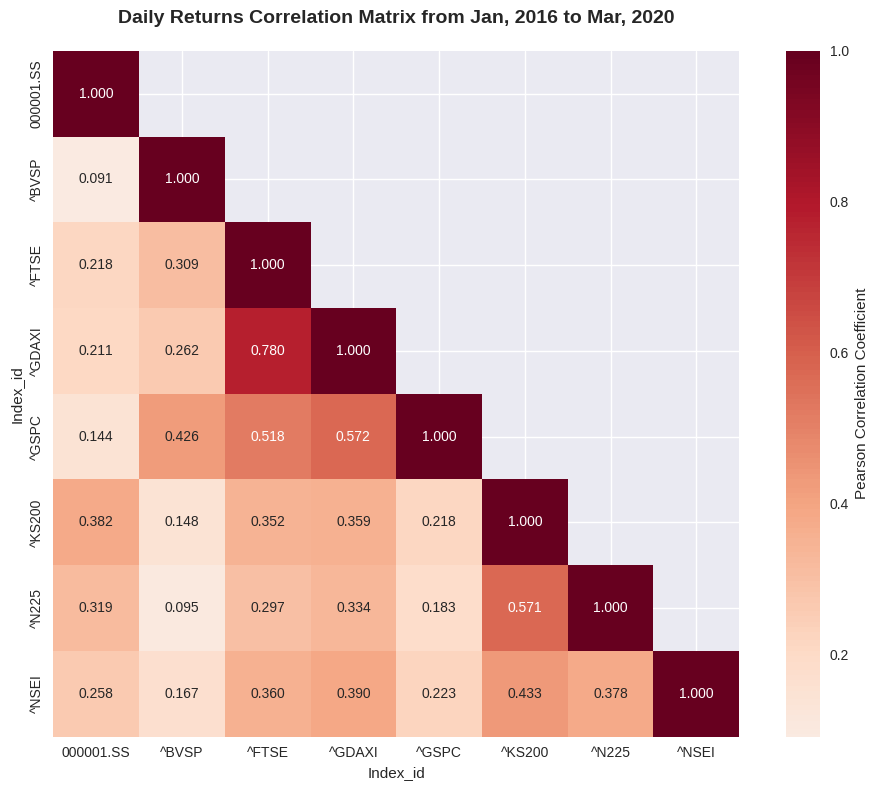

Post covid correlation structure : 


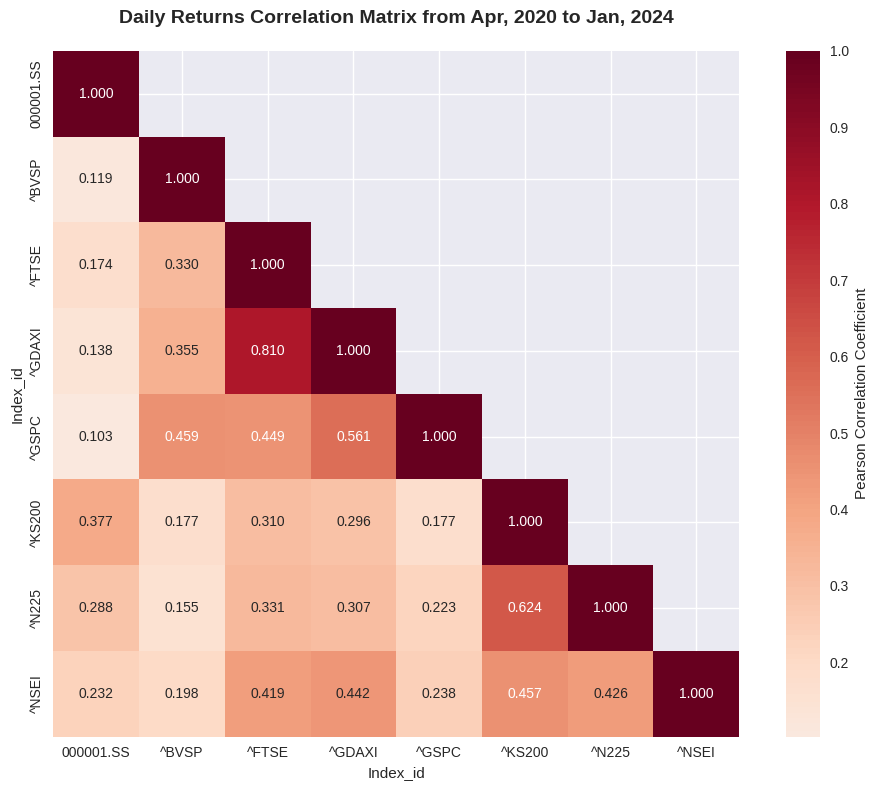

Index_id   000001.SS     ^BVSP     ^FTSE    ^GDAXI     ^GSPC    ^KS200  \
Index_id                                                                 
000001.SS   1.000000  0.119065  0.174139  0.137691  0.102830  0.377473   
^BVSP       0.119065  1.000000  0.329972  0.355411  0.458524  0.176863   
^FTSE       0.174139  0.329972  1.000000  0.810458  0.448730  0.310030   
^GDAXI      0.137691  0.355411  0.810458  1.000000  0.561496  0.296277   
^GSPC       0.102830  0.458524  0.448730  0.561496  1.000000  0.176770   
^KS200      0.377473  0.176863  0.310030  0.296277  0.176770  1.000000   
^N225       0.287549  0.154826  0.330572  0.306806  0.222526  0.624058   
^NSEI       0.232277  0.197926  0.419260  0.442472  0.238406  0.456825   

Index_id      ^N225     ^NSEI  
Index_id                       
000001.SS  0.287549  0.232277  
^BVSP      0.154826  0.197926  
^FTSE      0.330572  0.419260  
^GDAXI     0.306806  0.442472  
^GSPC      0.222526  0.238406  
^KS200     0.624058  0.456825  
^N225      1.000000  0.426215  
^NSEI      0.426215  1.000000

In [19]:
## Pre and post covid Correlation analysis between the major indices :
print('Pre covid correlation structure : ')
calculate_correlation_matrix(df_index_all_daily, freq='Daily', start_date=pre_covid_start_date, end_date=pre_covid_end_date)
print('Post covid correlation structure : ')
calculate_correlation_matrix(df_index_all_daily, freq='Daily', start_date=post_covid_start_date, end_date=post_covid_end_date)

### Sec 3.4.2 : Regime Shift analysis using Fisher Z test

In [20]:


def fisher_z_transform(r):
    """
    Apply Fisher Z transformation to correlation coefficient
    Formula: Z = 0.5 * ln((1+r)/(1-r))
    """
    # Handle edge cases where r is very close to ±1
    r = np.clip(r, -0.9999, 0.9999)
    return 0.5 * np.log((1 + r) / (1 - r))

def inverse_fisher_z(z):
    """
    Convert Fisher Z back to correlation coefficient
    Formula: r = (e^(2z) - 1)/(e^(2z) + 1)
    """
    return (np.exp(2 * z) - 1) / (np.exp(2 * z) + 1)

def test_correlation_difference(r1, n1, r2, n2, alpha=0.05):
    """
    Test if two correlation coefficients are significantly different
    using Fisher Z transformation

    Parameters:
    r1, r2: correlation coefficients for period 1 and 2
    n1, n2: sample sizes for period 1 and 2
    alpha: significance level (default 0.05)

    Returns:
    Dictionary with test results
    """

    # Fisher Z transformation
    z1 = fisher_z_transform(r1)
    z2 = fisher_z_transform(r2)

    # Standard errors
    se1 = 1 / np.sqrt(n1 - 3)
    se2 = 1 / np.sqrt(n2 - 3)

    # Combined standard error
    se_diff = np.sqrt(se1**2 + se2**2)

    # Z-statistic for the difference
    z_stat = (z1 - z2) / se_diff

    # Two-tailed p-value
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Critical value
    z_critical = stats.norm.ppf(1 - alpha/2)

    # Confidence interval for the difference in Fisher Z
    z_diff = z1 - z2
    ci_lower_z = z_diff - z_critical * se_diff
    ci_upper_z = z_diff + z_critical * se_diff

    # Convert CI back to correlation scale (approximate)
    r_diff = r1 - r2

    return {
        'r1': r1,
        'r2': r2,
        'r_difference': r_diff,
        'z1': z1,
        'z2': z2,
        'z_statistic': z_stat,
        'p_value': p_value,
        'significant': p_value < alpha,
        'ci_lower_z': ci_lower_z,
        'ci_upper_z': ci_upper_z,
        'alpha': alpha
    }

def correlation_regime_analysis(df, pre_covid_start='2016-01-01',
                               pre_covid_end='2020-03-01',
                               post_covid_start='2020-04-01',
                               post_covid_end='2024-01-01'):
    """
    Perform comprehensive correlation regime analysis using Fisher Z transformation

    Parameters:
    df: DataFrame with columns ['Date', 'Index_Id', 'pctg_return']
    """

    # Convert dates
    df['Date'] = pd.to_datetime(df['Date'])
    pre_covid_start = pd.to_datetime(pre_covid_start)
    pre_covid_end = pd.to_datetime(pre_covid_end)
    post_covid_start = pd.to_datetime(post_covid_start)
    post_covid_end = pd.to_datetime(post_covid_end)

    # Create pivot tables for each period
    def create_pivot(start_date, end_date):
        period_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
        return period_data.pivot(index='Date', columns='Index_id', values='pctg_return')

    pre_covid_pivot = create_pivot(pre_covid_start, pre_covid_end)
    post_covid_pivot = create_pivot(post_covid_start, post_covid_end)

    # Calculate correlation matrices
    pre_covid_corr = pre_covid_pivot.corr()
    post_covid_corr = post_covid_pivot.corr()

    # Get sample sizes
    n_pre = len(pre_covid_pivot.dropna())
    n_post = len(post_covid_pivot.dropna())

    print(f"Pre-COVID sample size: {n_pre}")
    print(f"Post-COVID sample size: {n_post}")

    # Get all pairs of indices
    indices = list(pre_covid_corr.columns)
    pairs = list(combinations(indices, 2))

    # Perform Fisher Z tests for all pairs
    results = []

    for idx1, idx2 in pairs:
        r_pre = pre_covid_corr.loc[idx1, idx2]
        r_post = post_covid_corr.loc[idx1, idx2]

        # Skip if correlation is NaN
        if pd.isna(r_pre) or pd.isna(r_post):
            continue

        test_result = test_correlation_difference(r_pre, n_pre, r_post, n_post)
        test_result['index_1'] = idx1
        test_result['index_2'] = idx2
        test_result['pair'] = f"{idx1} - {idx2}"

        results.append(test_result)

    results_df = pd.DataFrame(results)

    return results_df, pre_covid_corr, post_covid_corr



def summary_statistics(results_df):
    """
    Generate summary statistics for the Fisher Z analysis
    """

    print("="*60)
    print("FISHER Z TRANSFORMATION ANALYSIS SUMMARY")
    print("="*60)

    total_pairs = len(results_df)
    significant_pairs = results_df['significant'].sum()
    pct_significant = (significant_pairs / total_pairs) * 100

    print(f"Total correlation pairs tested: {total_pairs}")
    print(f"Significantly different correlations: {significant_pairs}")
    print(f"Percentage of significant changes: {pct_significant:.1f}%")
    print()

    print("CORRELATION CHANGE STATISTICS:")
    print("-" * 30)
    print(f"Mean correlation change: {results_df['r_difference'].mean():.4f}")
    print(f"Std correlation change: {results_df['r_difference'].std():.4f}")
    print(f"Max increase: {results_df['r_difference'].max():.4f}")
    print(f"Max decrease: {results_df['r_difference'].min():.4f}")
    print()

    print("MOST SIGNIFICANT CHANGES:")
    print("-" * 25)
    # Sort by p-value and show top 5 most significant
    top_changes = results_df.nsmallest(5, 'p_value')[['pair', 'r1', 'r2', 'r_difference', 'p_value']]
    print(top_changes.to_string(index=False, float_format='%.4f'))
    print()

    print("LARGEST CORRELATION CHANGES:")
    print("-" * 28)
    # Sort by absolute correlation change
    results_df['abs_change'] = abs(results_df['r_difference'])
    large_changes = results_df.nlargest(5, 'abs_change')[['pair', 'r1', 'r2', 'r_difference', 'p_value', 'significant']]
    print(large_changes[['pair', 'r1', 'r2', 'r_difference', 'p_value', 'significant']].to_string(index=False, float_format='%.4f'))




In [21]:
results_df, pre_covid_corr, post_covid_corr = correlation_regime_analysis(df_index_all_daily, pre_covid_start='2016-01-01',
                               pre_covid_end='2020-03-01',
                               post_covid_start='2020-04-01',
                               post_covid_end='2024-01-01')

display(results_df)
# detailed_results_table(results_df)

Pre-COVID sample size: 804
Post-COVID sample size: 737


r1        r2  r_difference        z1        z2  z_statistic  \
0   0.090877  0.119065     -0.028188  0.091128  0.119632    -0.557848   
1   0.217990  0.174139      0.043851  0.221545  0.175932     0.892687   
2   0.211267  0.137691      0.073575  0.214497  0.138572     1.485919   
3   0.144381  0.102830      0.041551  0.145397  0.103195     0.825936   
4   0.381840  0.377473      0.004367  0.402211  0.397109     0.099858   
5   0.319153  0.287549      0.031603  0.330703  0.295892     0.681280   
6   0.258303  0.232277      0.026026  0.264289  0.236595     0.542008   
7   0.309203  0.329972     -0.020769  0.319664  0.342797    -0.452725   
8   0.262007  0.355411     -0.093404  0.268262  0.371623    -2.022877   
9   0.425525  0.458524     -0.032999  0.454420  0.495441    -0.802817   
10  0.148281  0.176863     -0.028582  0.149382  0.178742    -0.574606   
11  0.095457  0.154826     -0.059370  0.095748  0.156082    -1.180776   
12  0.166545  0.197926     -0.031381  0.168111  0.200573    -0.635308   
13  0.779604  0.810458     -0.030854  1.044359  1.128363    -1.644019   
14  0.517655  0.448730      0.068925  0.573131  0.483109     1.761805   
15  0.351994  0.310030      0.041963  0.367717  0.320579     0.922543   
16  0.297181  0.330572     -0.033391  0.306424  0.343470    -0.725019   
17  0.360487  0.419260     -0.058773  0.377445  0.446794    -1.357209   
18  0.572189  0.561496      0.010693  0.650772  0.635016     0.308352   
19  0.358508  0.296277      0.062231  0.375173  0.305433     1.364871   
20  0.333638  0.306806      0.026832  0.346916  0.317015     0.585180   
21  0.390372  0.442472     -0.052100  0.412238  0.475300    -1.234171   
22  0.217861  0.176770      0.041090  0.221409  0.178647     0.836890   
23  0.182723  0.222526     -0.039803  0.184798  0.226312    -0.812454   
24  0.222829  0.238406     -0.015577  0.226631  0.243084    -0.321989   
25  0.570607  0.624058     -0.053451  0.648422  0.731625    -1.628344   
26  0.432513  0.456825     -0.024312  0.462984  0.493292    -0.593148   
27  0.378328  0.426215     -0.047887  0.398107  0.455262    -1.118573   

     p_value  significant  ci_lower_z  ci_upper_z  alpha    index_1 index_2  \
0   0.576948        False   -0.128651    0.071643   0.05  000001.SS   ^BVSP   
1   0.372025        False   -0.054534    0.145760   0.05  000001.SS   ^FTSE   
2   0.137301        False   -0.024222    0.176072   0.05  000001.SS  ^GDAXI   
3   0.408840        False   -0.057945    0.142349   0.05  000001.SS   ^GSPC   
4   0.920457        False   -0.095045    0.105249   0.05  000001.SS  ^KS200   
5   0.495695        False   -0.065336    0.134958   0.05  000001.SS   ^N225   
6   0.587813        False   -0.072452    0.127842   0.05  000001.SS   ^NSEI   
7   0.650747        False   -0.123280    0.077014   0.05      ^BVSP   ^FTSE   
8   0.043086         True   -0.203509   -0.003215   0.05      ^BVSP  ^GDAXI   
9   0.422081        False   -0.141168    0.059126   0.05      ^BVSP   ^GSPC   
10  0.565558        False   -0.129507    0.070787   0.05      ^BVSP  ^KS200   
11  0.237692        False   -0.160480    0.039814   0.05      ^BVSP   ^N225   
12  0.525228        False   -0.132609    0.067685   0.05      ^BVSP   ^NSEI   
13  0.100172        False   -0.184150    0.016144   0.05      ^FTSE  ^GDAXI   
14  0.078102        False   -0.010125    0.190169   0.05      ^FTSE   ^GSPC   
15  0.356246        False   -0.053008    0.147286   0.05      ^FTSE  ^KS200   
16  0.468440        False   -0.137193    0.063101   0.05      ^FTSE   ^N225   
17  0.174715        False   -0.169495    0.030799   0.05      ^FTSE   ^NSEI   
18  0.757814        False   -0.084391    0.115903   0.05     ^GDAXI   ^GSPC   
19  0.172293        False   -0.030407    0.169887   0.05     ^GDAXI  ^KS200   
20  0.558427        False   -0.070246    0.130048   0.05     ^GDAXI   ^N225   
21  0.217139        False   -0.163209    0.037085   0.05     ^GDAXI   ^NSEI   
22  0.402654        False   -0.057385    0.142909   0.05      ^GSPC  ^KS200

In [22]:
summary_statistics(results_df)

FISHER Z TRANSFORMATION ANALYSIS SUMMARY
Total correlation pairs tested: 28
Significantly different correlations: 1
Percentage of significant changes: 3.6%

CORRELATION CHANGE STATISTICS:
------------------------------
Mean correlation change: -0.0064
Std correlation change: 0.0450
Max increase: 0.0736
Max decrease: -0.0934

MOST SIGNIFICANT CHANGES:
-------------------------
              pair     r1     r2  r_difference  p_value
    ^BVSP - ^GDAXI 0.2620 0.3554       -0.0934   0.0431
     ^FTSE - ^GSPC 0.5177 0.4487        0.0689   0.0781
    ^FTSE - ^GDAXI 0.7796 0.8105       -0.0309   0.1002
    ^KS200 - ^N225 0.5706 0.6241       -0.0535   0.1035
000001.SS - ^GDAXI 0.2113 0.1377        0.0736   0.1373

LARGEST CORRELATION CHANGES:
----------------------------
              pair     r1     r2  r_difference  p_value  significant
    ^BVSP - ^GDAXI 0.2620 0.3554       -0.0934   0.0431         True
000001.SS - ^GDAXI 0.2113 0.1377        0.0736   0.1373        False
     ^FTSE - ^GSPC 

In [23]:
def get_date_of_highest_rolling_mean(df):
    """
    Finds the date (month and year) of the highest rolling mean for each index.

    Args:
        df: DataFrame with 'Index_id', 'Date', and 'rolling_mean_1_yr' columns.

    Returns:
        DataFrame with 'Index_id', 'Highest_Rolling_Mean', and 'Date' (month and year).
    """
    highest_rolling_mean_dates = []
    for index_id, group in df.groupby('Index_id'):
        max_rolling_mean_row = group.loc[group['rolling_mean_1_yr'].idxmax()]
        highest_rolling_mean_dates.append({
            'Index_id': index_id,
            'Highest_Rolling_Mean': max_rolling_mean_row['rolling_mean_1_yr'],
            'Date': max_rolling_mean_row['Date'].strftime('%B, %Y') # Format to Month, Year
        })
    return pd.DataFrame(highest_rolling_mean_dates)

highest_rolling_means_with_dates = get_date_of_highest_rolling_mean(df_rolling_means)
display(highest_rolling_means_with_dates)

Index_id  Highest_Rolling_Mean         Date
0  000001.SS              0.001133  April, 2021
1      ^BVSP              0.002588  March, 2021
2      ^FTSE              0.001282  March, 2021
3     ^GDAXI              0.002323  March, 2021
4      ^GSPC              0.002335  March, 2021
5     ^KS200              0.003026  March, 2021
6      ^N225              0.002389  April, 2021
7      ^NSEI              0.002680  March, 2021